In [3]:
import glob
import pandas as pd

files = glob.glob("data/raw/*.csv")
# dfs = [pd.read_csv(f, header=None, sep=";") for f in files]

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:

names = ['lookup', 'parcel', 'resbldg', 'rpsale']

In [5]:
files

['data/raw\\EXTR_LookUp.csv',
 'data/raw\\EXTR_Parcel.csv',
 'data/raw\\EXTR_ResBldg.csv',
 'data/raw\\EXTR_RPSale.csv']

In [6]:
dict_dfs = {}
for x,y in zip(names, files):
    dict_dfs[x] = pd.read_csv(y)



In [7]:
pd.set_option("display.max_columns", 200)

In [8]:
pd.set_option("display.max_rows", 200)

In [9]:
lookup_df = dict_dfs['lookup']
parcel_df = dict_dfs['parcel']
resbldg_df = dict_dfs['resbldg']
rpsale_df = dict_dfs['rpsale']

In [10]:
parcel_df.head()

Unnamed: 0   Major  Minor PropName                            PlatName  \
0           0  807841    410                      SUMMER RIDGE DIV NO. 02   
1           2  755080     15           SANDER'S TO GILMAN PK & SALMON BAY   
2           3  888600    135                           VASHON GARDENS ADD   
3           6   22603   9181                                          NaN   
4           7  229670    160                               ELDORADO NORTH   

          PlatLot PlatBlock  Range  Township  Section QuarterSection PropType  \
0  41                            6        25       22             SW        R   
1  3                1            3        25       11             NW        R   
2  21                            3        22        8             NE        R   
3                                3        26        2             NW        R   
4  16                            5        26       19             SW        R   

    Area  SubArea  SpecArea  SpecSubArea DistrictName  LevyCode CurrentZoning  \
0   35.0      2.0       NaN          NaN    SAMMAMISH      2187            R4   
1   19.0      1.0       NaN          NaN      SEATTLE        10       SF 5000   
2  100.0      3.0       NaN          NaN  KING COUNTY      4055           RA5   
3    1.0      1.0       NaN          NaN    SHORELINE      2263            R6   
4   37.0      2.0       NaN          NaN     KIRKLAND      1708         RSA 6   

   HBUAsIfVacant  HBUAsImproved  PresentUse  SqFtLot  WaterSystem  \
0              1              1           2     7424            2   
1              1              1           2     5000            2   
2              1              1           2   277041            2   
3              1              1           2    10560            2   
4              1              1           2     9853            2   

   SewerSystem  Access  Topography  StreetSurface  RestrictiveSzShape  \
0            2       4           0              1                   0   
1            2       4           0              1                   0   
2            1       4           0              1                   0   
3            2       4           0              1                   0   
4            2       4           0              1                   0   

   InadequateParking  PcntUnusable  Unbuildable  MtRainier  Olympics  \
0                  0             0        False          0         0   
1                  0             0        False          0         0   
2                  2             0        False          0         0   
3                  0             0        False          0         2   
4                  2             0        False          0         0   

   Cascades  Territorial  SeattleSkyline  PugetSound  LakeWashington  \
0         0            0               0           0               0   
1         0            0               0           0               0   
2         0            0               0           0               0   
3         0            2               0           2               0   
4         0            0               0           0               0   

   LakeSammamish  SmallLakeRiverCreek  OtherView  WfntLocation  WfntFootage  \
0              0                    0          0             0            0   
1              0                    0          0             0            0   
2              0                    0          0             0            0   
3              0                    0          0             0            0   
4              0                    0          0             0            0   

   WfntBank  WfntPoorQuality  WfntRestrictedAccess WfntAccessRights  \
0         0                0                     0                N   
1         0                0                     0                N   
2         0                0                     0                N   
3         0                0                     0                N   
4         0     

 Lets clean up the Parcel dataframe first...

In [11]:
parcel_df.isna().sum()

Unnamed: 0                     0
Major                          0
Minor                          0
PropName                    9111
PlatName                   28545
PlatLot                        0
PlatBlock                      0
Range                          0
Township                       0
Section                        0
QuarterSection                 0
PropType                       0
Area                           6
SubArea                        6
SpecArea                  200335
SpecSubArea               200335
DistrictName                   0
LevyCode                       0
CurrentZoning                  0
HBUAsIfVacant                  0
HBUAsImproved                  0
PresentUse                     0
SqFtLot                        0
WaterSystem                    0
SewerSystem                    0
Access                         0
Topography                     0
StreetSurface                  0
RestrictiveSzShape             0
InadequateParking              0
PcntUnusab

Straight away can be seen that PlatName column has many null values, and it has 11028 unique entries, I will 

In [14]:
len(parcel_df.PlatName.value_counts())

AttributeError: 'DataFrame' object has no attribute 'PlatName'

In [13]:
parcel_df = parcel_df.drop(columns=['Unnamed: 0','PropName', 'PlatName', 'PlatLot', 'PlatBlock', 'Range','SpecArea', 'SpecSubArea',  ], axis=1)

KeyError: "['Unnamed: 0' 'PropName' 'PlatName' 'PlatLot' 'PlatBlock' 'Range'\n 'SpecArea' 'SpecSubArea'] not found in axis"

In [15]:
print(parcel_df.isna().sum())

Major                     0
Minor                     0
Township                  0
Section                   0
QuarterSection            0
PropType                  0
Area                      6
SubArea                   6
DistrictName              0
LevyCode                  0
CurrentZoning             0
HBUAsIfVacant             0
HBUAsImproved             0
PresentUse                0
SqFtLot                   0
WaterSystem               0
SewerSystem               0
Access                    0
Topography                0
StreetSurface             0
RestrictiveSzShape        0
InadequateParking         0
PcntUnusable              0
Unbuildable               0
MtRainier                 0
Olympics                  0
Cascades                  0
Territorial               0
SeattleSkyline            0
PugetSound                0
LakeWashington            0
LakeSammamish             0
SmallLakeRiverCreek       0
OtherView                 0
WfntLocation              0
WfntFootage         

In [16]:
parcel_df.describe()

Major          Minor       Township        Section  \
count  205199.000000  205199.000000  205199.000000  205199.000000   
mean   441061.323871    1807.292604      23.805667      18.461050   
std    287100.767764    3091.516315       1.662678      10.269159   
min        20.000000       0.000000       0.000000       0.000000   
25%    196220.000000     120.000000      23.000000       9.000000   
50%    367940.000000     350.000000      24.000000      18.000000   
75%    721481.000000    1250.000000      25.000000      27.000000   
max    990600.000000    9694.000000      26.000000      36.000000   

                Area        SubArea       LevyCode  HBUAsIfVacant  \
count  205193.000000  205193.000000  205199.000000  205199.000000   
mean       48.381753       8.008392    1629.672294       1.779516   
std        27.080454      11.394524    1884.344196       2.905448   
min         0.000000       0.000000      10.000000       0.000000   
25%        25.000000       3.000000      10.000000       1.000000   
50%        48.000000       5.000000    1205.000000       1.000000   
75%        71.000000       9.000000    2174.000000       1.000000   
max       540.000000     110.000000    7570.000000      21.000000   

       HBUAsImproved     PresentUse       SqFtLot    WaterSystem  \
count  205199.000000  205199.000000  2.051990e+05  205199.000000   
mean        0.972105      26.094167  3.321730e+04       1.940214   
std         0.304982      73.593180  4.159798e+05       0.308211   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%         1.000000       2.000000  5.118000e+03       2.000000   
50%         1.000000       2.000000  7.830000e+03       2.000000   
75%         1.000000       2.000000  1.216600e+04       2.000000   
max         4.000000     343.000000  7.637489e+07       4.000000   

         SewerSystem         Access     Topography  StreetSurface  \
count  205199.000000  205199.000000  205199.000000  205199.000000   
mean        1.816875       3.891871       0.094055       1.006213   
std         0.461459       0.447373       0.291906       0.276193   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.000000       4.000000       0.000000       1.000000   
50%         2.000000       4.000000       0.000000       1.000000   
75%         2.000000       4.000000       0.000000       1.000000   
max         4.000000       5.000000       1.000000       4.000000   

       RestrictiveSzShape  InadequateParking   PcntUnusable      MtRainier  \
count       205199.000000      205199.000000  205199.000000  205199.000000   
mean             0.015677           1.293257       0.128875       0.025219   
std              0.124225           0.954324       3.277020       0.264434   
min              0.000000           0.000000       0.000000       0.000000   
25%              0.000000           0.000000       0.000000       0.000000   
50%              0.000000           2.000000       0.000000       0.000000   
75%              0.000000           2.000000       0.000000       0.000000   
max              1.000000           2.000000     100.000000       4.000000   

            Olympics       Cascades    Territorial  SeattleSkyline  \
count  205199.000000  205199.000000  205199.000000   205199.000000   
mean        0.064372       0.066087       0.250747        0.023309   
std         0.416784       0.405200       0.790392        0.252913   
min         0.000000       0.000000       0.000000        0.000000   
25%         0.000000       0.000000       0.000000        0.000000   
50%         0.000000       0.000000       0.000000        0.000000   
75%         0.000000       0.000000       0.000000        0.000000   
max         4.000000       4.000000       4.000000        4.000000   

          PugetSound  LakeWashington  LakeSammamish  SmallLakeRiverCreek  \
count  205199.000000   205199.000000  205199.000000        205199.000000   
mean        0.070234        0.063875       0.01540

In [17]:
parcel_df.dropna(subset=['SubArea', 'Area'], inplace=True)

In [18]:
parcel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205193 entries, 0 to 205198
Data columns (total 74 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Major                   205193 non-null  int64  
 1   Minor                   205193 non-null  int64  
 2   Township                205193 non-null  int64  
 3   Section                 205193 non-null  int64  
 4   QuarterSection          205193 non-null  object 
 5   PropType                205193 non-null  object 
 6   Area                    205193 non-null  float64
 7   SubArea                 205193 non-null  float64
 8   DistrictName            205193 non-null  object 
 9   LevyCode                205193 non-null  int64  
 10  CurrentZoning           205193 non-null  object 
 11  HBUAsIfVacant           205193 non-null  int64  
 12  HBUAsImproved           205193 non-null  int64  
 13  PresentUse              205193 non-null  int64  
 14  SqFtLot             

In [20]:
sns.pairplot(parcel_df)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000176BC8EF670> (for post_execute):


KeyboardInterrupt: 

In [21]:
parcel_df[(parcel_df['Minor'] == 410) & (parcel_df.Major == 807841)]

Major  Minor  Township  Section QuarterSection PropType  Area  SubArea  \
0  807841    410        25       22             SW        R  35.0      2.0   

  DistrictName  LevyCode CurrentZoning  HBUAsIfVacant  HBUAsImproved  \
0    SAMMAMISH      2187            R4              1              1   

   PresentUse  SqFtLot  WaterSystem  SewerSystem  Access  Topography  \
0           2     7424            2            2       4           0   

   StreetSurface  RestrictiveSzShape  InadequateParking  PcntUnusable  \
0              1                   0                  0             0   

   Unbuildable  MtRainier  Olympics  Cascades  Territorial  SeattleSkyline  \
0        False          0         0         0            0               0   

   PugetSound  LakeWashington  LakeSammamish  SmallLakeRiverCreek  OtherView  \
0           0               0              0                    0          0   

   WfntLocation  WfntFootage  WfntBank  WfntPoorQuality  WfntRestrictedAccess  \
0             0            0         0                0                     0   

  WfntAccessRights WfntProximityInfluence  TidelandShoreland  LotDepthFactor  \
0                N                      N                  0               0   

   TrafficNoise  AirportNoise PowerLines OtherNuisances  NbrBldgSites  \
0             0             0          N              N             0   

   Contamination DNRLease AdjacentGolfFairway AdjacentGreenbelt  HistoricSite  \
0              0        N                   N                 N             0   

   CurrentUseDesignation NativeGrowthProtEsmt Easements OtherDesignation  \
0                      0                    N         N                N   

  DeedRestrictions DevelopmentRightsPurch CoalMineHazard CriticalDrainage  \
0                N                      N              N                N   

  ErosionHazard LandfillBuffer HundredYrFloodPlain SeismicHazard  \
0             N              N                   N             N   

  LandslideHazard SteepSlopeHazard Stream Wetland SpeciesOfConcern  \
0               N                N      N       N                N   

  SensitiveAreaTract WaterProblems TranspConcurrency OtherProblems  
0                  N             N                 N             N

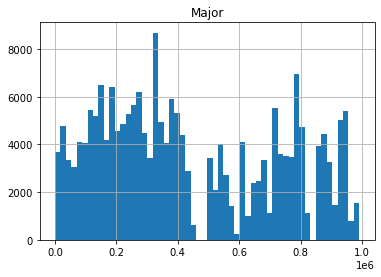

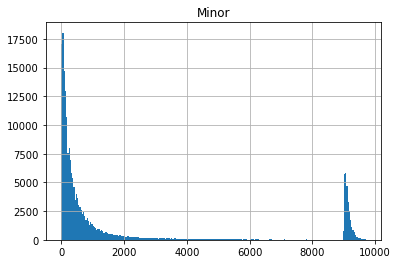

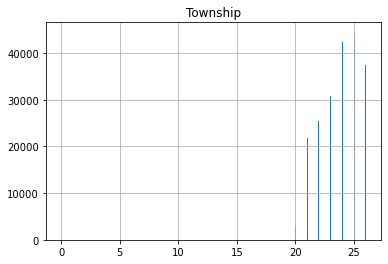

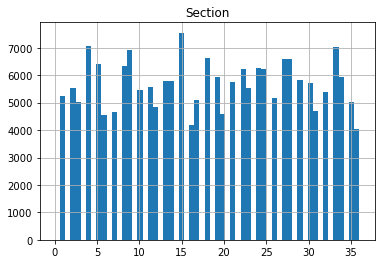

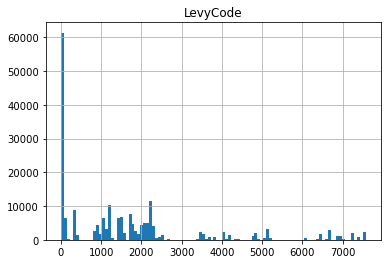

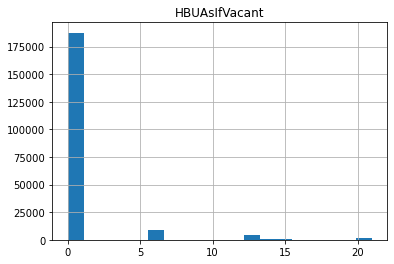

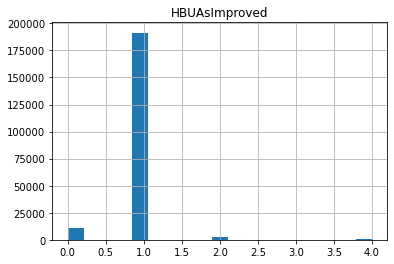

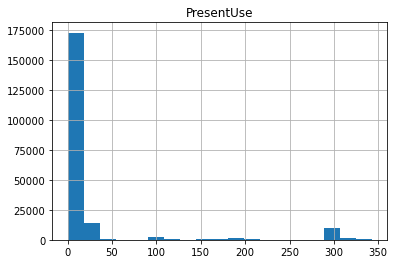

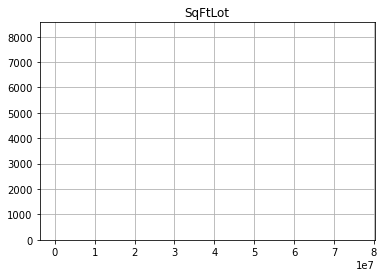

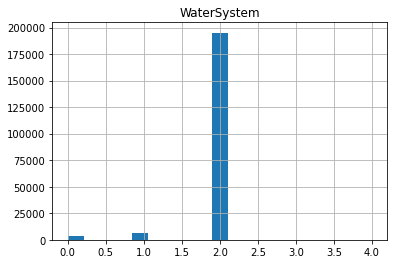

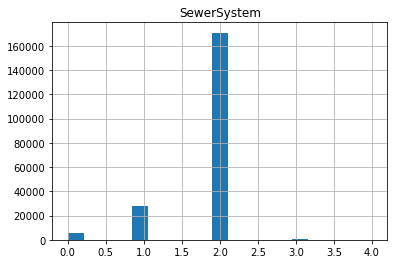

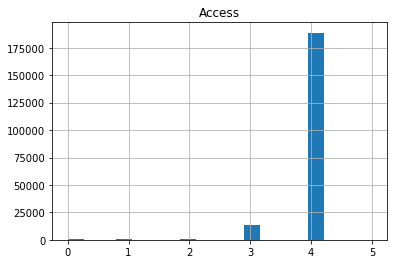

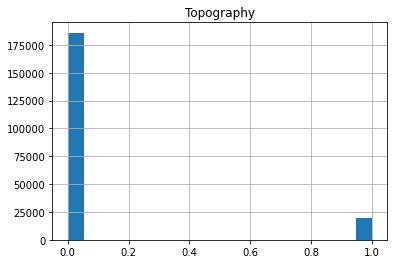

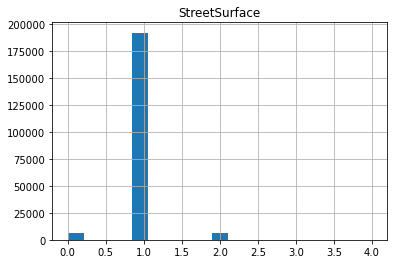

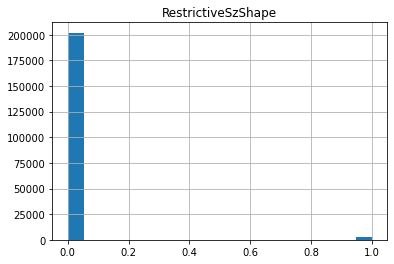

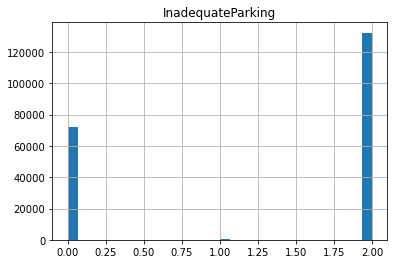

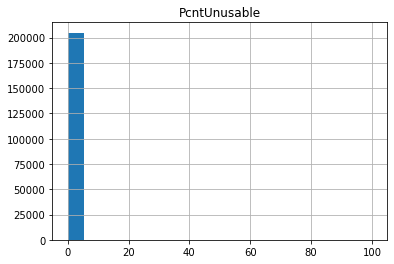

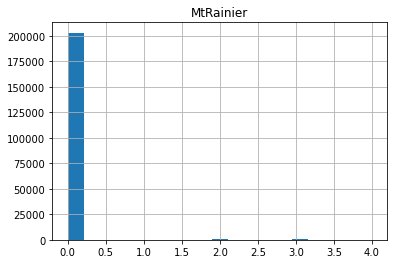

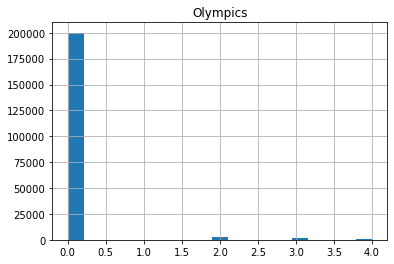

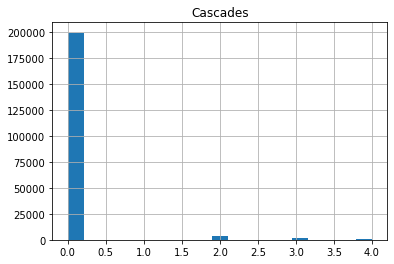

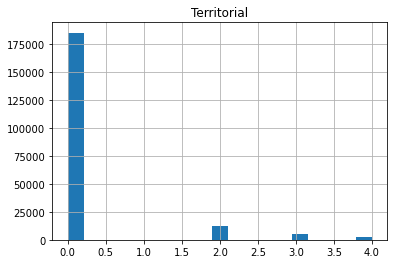

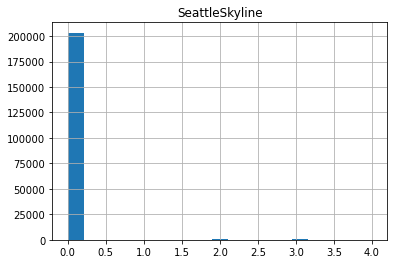

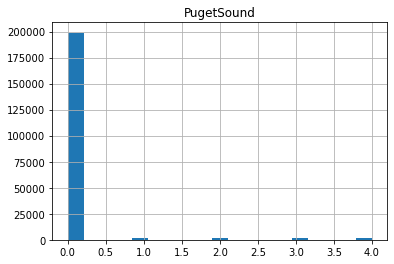

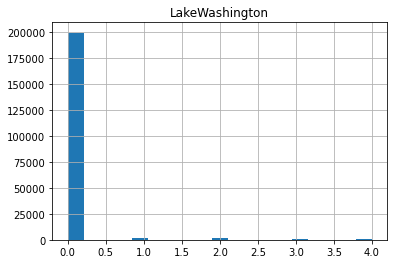

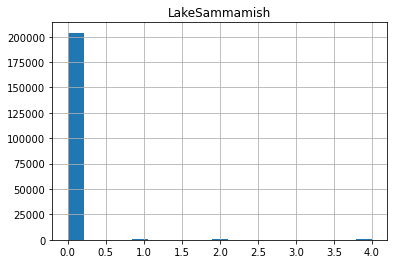

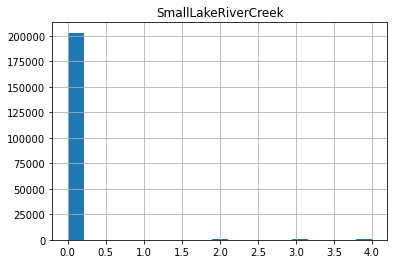

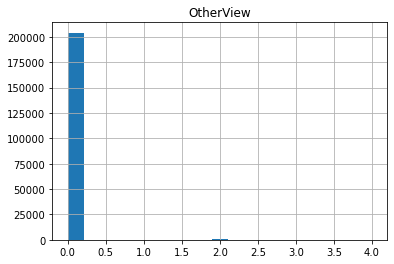

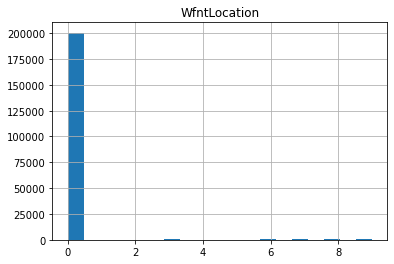

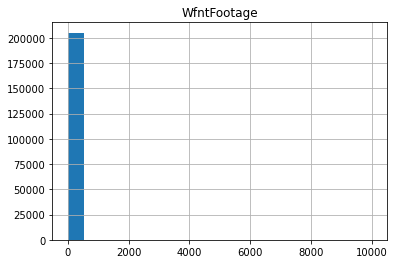

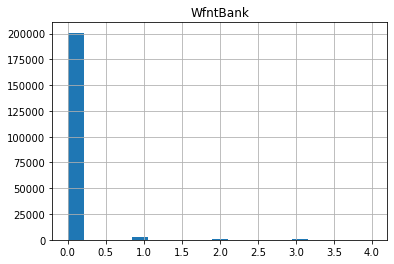

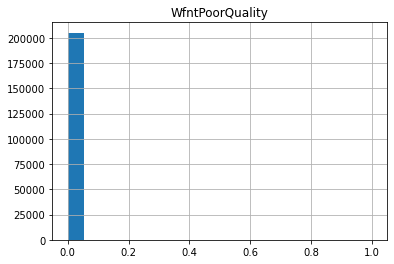

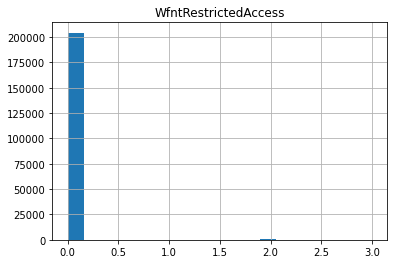

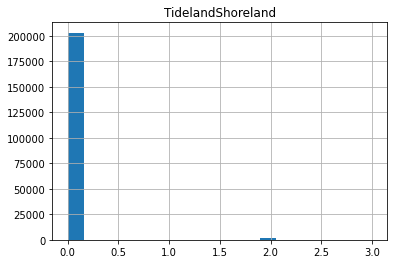

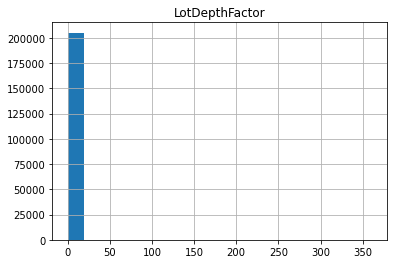

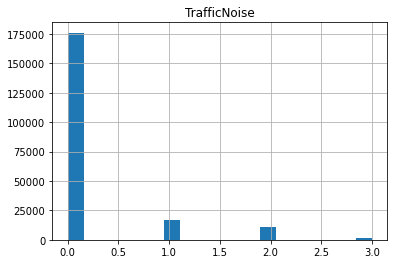

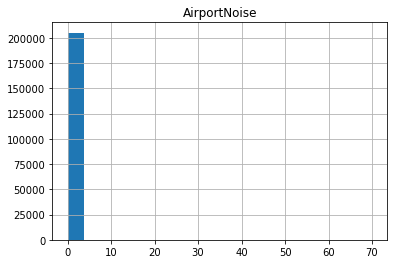

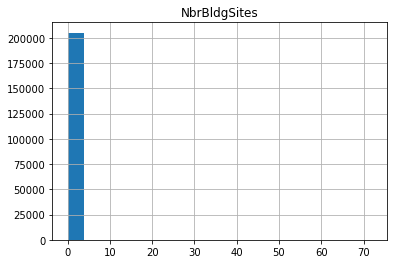

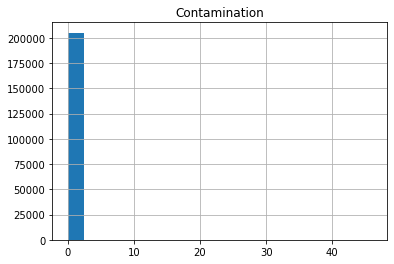

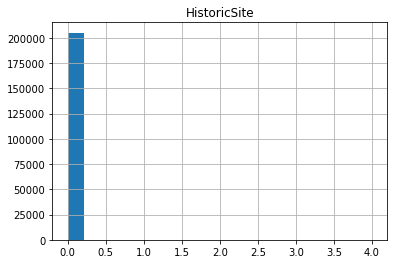

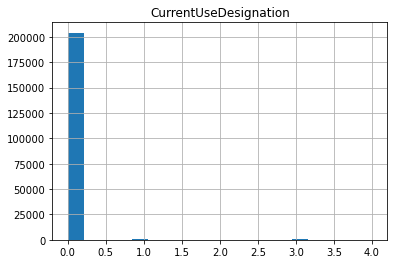

In [39]:
for col in parcel_df.columns:
    if parcel_df[col].dtype == 'int64':
        parcel_df[col].hist(bins='auto')
        plt.title(col)
        plt.show()


In [38]:
parcel_df.SqFtLot.value_counts() 'NbrBlgSites', 'AirportNoise', 

5000      3184
6000      2767
7200      2184
4000      2161
4800      1167
          ... 
208729       1
61345        1
51108        1
55206        1
190307       1
Name: SqFtLot, Length: 35705, dtype: int64

In [23]:
parcel_df.Unbuildable.value_counts()

False    202970
True       2223
Name: Unbuildable, dtype: int64

In [18]:
parcel_df = parcel_df.drop(columns=['LevyCode','PcntUnusable'], axis=1)

In [62]:
parcel_df['identifier'] = parcel_df['Major'].astype(str) + parcel_df['Minor'].astype(str)
resbldg_df['identifier'] = resbldg_df['Major'].astype(str) + resbldg_df['Minor'].astype(str)
rpsale_df['identifier'] = rpsale_df['Major'].astype(str) + rpsale_df['Minor'].astype(str)

In [60]:
parcel_df.head()

Major  Minor  Township  Section QuarterSection PropType   Area  SubArea  \
0  807841    410        25       22             SW        R   35.0      2.0   
1  755080     15        25       11             NW        R   19.0      1.0   
2  888600    135        22        8             NE        R  100.0      3.0   
3   22603   9181        26        2             NW        R    1.0      1.0   
4  229670    160        26       19             SW        R   37.0      2.0   

  DistrictName CurrentZoning  HBUAsIfVacant  HBUAsImproved  PresentUse  \
0    SAMMAMISH            R4              1              1           2   
1      SEATTLE       SF 5000              1              1           2   
2  KING COUNTY           RA5              1              1           2   
3    SHORELINE            R6              1              1           2   
4     KIRKLAND         RSA 6              1              1           2   

   SqFtLot  WaterSystem  SewerSystem  Access  Topography  StreetSurface  \
0     7424            2            2       4           0              1   
1     5000            2            2       4           0              1   
2   277041            2            1       4           0              1   
3    10560            2            2       4           0              1   
4     9853            2            2       4           0              1   

   RestrictiveSzShape  InadequateParking  Unbuildable  MtRainier  Olympics  \
0                   0                  0        False          0         0   
1                   0                  0        False          0         0   
2                   0                  2        False          0         0   
3                   0                  0        False          0         2   
4                   0                  2        False          0         0   

   Cascades  Territorial  SeattleSkyline  PugetSound  LakeWashington  \
0         0            0               0           0               0   
1         0            0               0           0               0   
2         0            0               0           0               0   
3         0            2               0           2               0   
4         0            0               0           0               0   

   LakeSammamish  SmallLakeRiverCreek  OtherView  WfntLocation  WfntFootage  \
0              0                    0          0             0            0   
1              0                    0          0             0            0   
2              0                    0          0             0            0   
3              0                    0          0             0            0   
4              0                    0          0             0            0   

   WfntBank  WfntPoorQuality  WfntRestrictedAccess WfntAccessRights  \
0         0                0                     0                N   
1         0                0                     0                N   
2         0                0                     0                N   
3         0                0                     0                N   
4         0                0                     0                N   

  WfntProximityInfluence  TidelandShoreland  LotDepthFactor  TrafficNoise  \
0                      N                  0               0             0   
1                      N                  0               0             0   
2                      N                  0               0             0   
3                      N                  0               0             0   
4                      N                  0               0             0   

   AirportNoise PowerLines OtherNuisances  NbrBldgSites  Contamination  \
0             0          N              N             0              0   
1             0          N              N             0              0   
2             0          N              N             0              0   
3             0          N              N             0              0

In [44]:
resbldg_df[(resbldg_df['Minor'] == 410) & (resbldg_df.Major == 807841)]

Major  Minor  BldgNbr  NbrLivingUnits                    Address  \
109303  807841    410        1               1  23430  NE 27TH ST   98074   

       BuildingNumber Fraction DirectionPrefix                 StreetName  \
109303          23430                       NE  27TH                        

       StreetType DirectionSuffix ZipCode  Stories  BldgGrade  BldgGradeVar  \
109303     ST                       98074      2.0          8             0   

        SqFt1stFloor  SqFtHalfFloor  SqFt2ndFloor  SqFtUpperFloor  \
109303          1360              0           840               0   

        SqFtUnfinFull  SqFtUnfinHalf  SqFtTotLiving  SqFtTotBasement  \
109303              0              0           2200                0   

        SqFtFinBasement  FinBasementGrade  SqFtGarageBasement  \
109303                0                 0                   0   

        SqFtGarageAttached DaylightBasement  SqFtOpenPorch  SqFtEnclosedPorch  \
109303                 460                N              0                  0   

        SqFtDeck  HeatSystem  HeatSource  BrickStone ViewUtilization  \
109303         0           5           2           0               N   

        Bedrooms  BathHalfCount  Bath3qtrCount  BathFullCount  FpSingleStory  \
109303         4              1              1              1              0   

        FpMultiStory  FpFreestanding  FpAdditional  YrBuilt  YrRenovated  \
109303             1               0             0     1987            0   

        PcntComplete  Obsolescence  PcntNetCondition  Condition  AddnlCost  
109303             0             0                 0          3          0

In [45]:
rpsale_df[(rpsale_df['Minor'] == 410) & (rpsale_df.Major == 807841)]

ExciseTaxNbr   Major  Minor DocumentDate  SalePrice    RecordingNbr  \
318305       3005895  807841    410   08/16/2019     847888                   

       Volume Page PlatNbr PlatType         PlatLot PlatBlock  \
318305                                                          

                                               SellerName  \
318305  PRESTO-FINLON CARRIE L+ANDREW T               ...   

                                                BuyerName  PropertyType  \
318305  GAO XINBO+JIANG SHUYUAN                       ...            11   

        PrincipalUse  SaleInstrument AFForestLand AFCurrentUseLand  \
318305             6               3            N                N   

       AFNonProfitUse AFHistoricProperty  SaleReason  PropertyClass  \
318305              N                  N           1              8   

       SaleWarning  
318305

In [46]:
lookup_df.head()

LUType  LUItem                                      LUDescription
0       1       1  LAND ONLY                                     ...
1       1      10  Land with new building                        ...
2       1      11  Household, single family units                ...
3       1      12  Multiple family residence (Residential, 2-4 un...
4       1      13  Multiple family residence (Residential, 5+ uni...

In [40]:
lookup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LUType         1208 non-null   int64 
 1   LUItem         1208 non-null   int64 
 2   LUDescription  1208 non-null   object
dtypes: int64(2), object(1)
memory usage: 28.4+ KB


In [94]:
parcel_df[parcel_df.duplicated(subset='identifier')]

Major  Minor  Township  Section QuarterSection PropType  Area  SubArea  \
78664  25910    170        26       12             NE        R   1.0      3.0   

      DistrictName CurrentZoning  HBUAsIfVacant  HBUAsImproved  PresentUse  \
78664    SHORELINE            R6              1              1           2   

       SqFtLot  WaterSystem  SewerSystem  Access  Topography  StreetSurface  \
78664     7600            2            2       4           0              1   

       RestrictiveSzShape  InadequateParking  Unbuildable  MtRainier  \
78664                   0                  0        False          0   

       Olympics  Cascades  Territorial  SeattleSkyline  PugetSound  \
78664         0         0            0               0           0   

       LakeWashington  LakeSammamish  SmallLakeRiverCreek  OtherView  \
78664               0              0                    0          0   

       WfntLocation  WfntFootage  WfntBank  WfntPoorQuality  \
78664             0            0         0                0   

       WfntRestrictedAccess WfntAccessRights WfntProximityInfluence  \
78664                     0                N                      N   

       TidelandShoreland  LotDepthFactor  TrafficNoise  AirportNoise  \
78664                  0               0             0             0   

      PowerLines OtherNuisances  NbrBldgSites  Contamination DNRLease  \
78664          N              N             0              0        N   

      AdjacentGolfFairway AdjacentGreenbelt  HistoricSite  \
78664                   N                 N             0   

       CurrentUseDesignation NativeGrowthProtEsmt Easements OtherDesignation  \
78664                      0                    N         N                N   

      DeedRestrictions DevelopmentRightsPurch CoalMineHazard CriticalDrainage  \
78664                N                      N              N                N   

      ErosionHazard LandfillBuffer HundredYrFloodPlain SeismicHazard  \
78664             N              N                   N             N   

      LandslideHazard SteepSlopeHazard Stream Wetland SpeciesOfConcern  \
78664               N                N      N       N                N   

      SensitiveAreaTract WaterProblems TranspConcurrency OtherProblems  \
78664                  N             N                 N             N   

      identifier  
78664   25910170

In [95]:
parcel_df[parcel_df['identifier']=='25910170']

Major  Minor  Township  Section QuarterSection PropType  Area  \
27502  259101     70        26       33             SW        R  74.0   
78664   25910    170        26       12             NE        R   1.0   

       SubArea DistrictName CurrentZoning  HBUAsIfVacant  HBUAsImproved  \
27502      8.0     KIRKLAND        RS 8.5              1              1   
78664      3.0    SHORELINE            R6              1              1   

       PresentUse  SqFtLot  WaterSystem  SewerSystem  Access  Topography  \
27502           2     9587            2            2       3           1   
78664           2     7600            2            2       4           0   

       StreetSurface  RestrictiveSzShape  InadequateParking  Unbuildable  \
27502              1                   0                  2        False   
78664              1                   0                  0        False   

       MtRainier  Olympics  Cascades  Territorial  SeattleSkyline  PugetSound  \
27502          0         0         0            0               0           0   
78664          0         0         0            0               0           0   

       LakeWashington  LakeSammamish  SmallLakeRiverCreek  OtherView  \
27502               0              0                    0          0   
78664               0              0                    0          0   

       WfntLocation  WfntFootage  WfntBank  WfntPoorQuality  \
27502             0            0         0                0   
78664             0            0         0                0   

       WfntRestrictedAccess WfntAccessRights WfntProximityInfluence  \
27502                     0                N                      N   
78664                     0                N                      N   

       TidelandShoreland  LotDepthFactor  TrafficNoise  AirportNoise  \
27502                  0               0             0             0   
78664                  0               0             0             0   

      PowerLines OtherNuisances  NbrBldgSites  Contamination DNRLease  \
27502          N              N             0              0        N   
78664          N              N             0              0        N   

      AdjacentGolfFairway AdjacentGreenbelt  HistoricSite  \
27502                   N                 N             0   
78664                   N                 N             0   

       CurrentUseDesignation NativeGrowthProtEsmt Easements OtherDesignation  \
27502                      0                    N         N                N   
78664                      0                    N         N                N   

      DeedRestrictions DevelopmentRightsPurch CoalMineHazard CriticalDrainage  \
27502                N                      N              N                N   
78664                N                      N              N                N   

      ErosionHazard LandfillBuffer HundredYrFloodPlain SeismicHazard  \
27502             N              N                   N             N   
78664             N              N                   N             N   

      LandslideHazard SteepSlopeHazard Stream Wetland SpeciesOfConcern  \
27502               N                N      N       N                N   
78664               N                N      N       N                N   

      SensitiveAreaTract WaterProblems TranspConcurrency OtherProblems  \
27502                  N             N                 N             N   
78664                  N             N                 N             N   

      identifier  
27502   25910170  
78664   25910170

In [19]:
merge_df = resbldg_df.merge(parcel_df, left_on=['Major','Minor'], right_on = ['Major','Minor'], how='left')

In [20]:
merge_df[merge_df.duplicated(subset=['Major','Minor'])]

Major  Minor  BldgNbr  NbrLivingUnits  \
33       17900    420        2               1   
219      22306   9018        1               1   
326      22605   9063        2               1   
467      22405   9228        1               1   
513      17900   1465        1               1   
...        ...    ...      ...             ...   
180307  811310    595        2               1   
180535  362006   9033        1               1   
180854  981870    580        2               2   
180998  242303   9186        2               1   
181213  636700     20        2               1   

                                  Address BuildingNumber Fraction  \
33              12215   44TH AVE S  98178          12215            
219            24400  SE 103RD ST   98027          24400            
326           20202   156TH AVE NE  98072          20202            
467             15861  SE 16TH ST   98008          15861            
513              4816  S 124TH ST   98178          4816             
...                                   ...            ...      ...   
180307          4234  S GRAHAM ST   98118          4234             
180535  26319  SE MUD MOUNTAIN RD   98022          26319            
180854             340   27TH AVE   98122          340              
180998          1600  SW 156TH ST   98166          1600             
181213           310  SW 122ND ST   98146          310              

       DirectionPrefix                 StreetName StreetType DirectionSuffix  \
33                      44TH                          AVE                 S    
219                 SE  103RD                         ST                       
326                     156TH                         AVE                 NE   
467                 SE  16TH                          ST                       
513                 S   124TH                         ST                       
...                ...                        ...        ...             ...   
180307              S   GRAHAM                        ST                       
180535              SE  MUD MOUNTAIN                  RD                       
180854                  27TH                          AVE                      
180998              SW  156TH                         ST                       
181213              SW  122ND                         ST                       

       ZipCode  Stories  BldgGrade  BldgGradeVar  SqFt1stFloor  SqFtHalfFloor  \
33       98178      1.0          5             0           518              0   
219      98027      2.0         10             0          1990              0   
326      98072      1.0          5             0           820              0   
467      98008      1.0         11             0          3570              0   
513      98178      1.0          6             0           800              0   
...        ...      ...        ...           ...           ...            ...   
180307   98118      1.0          5             0           480              0   
180535   98022      1.5          8             0          1730            910   
180854   98122      1.0          6             0          1310              0   
180998   98166      1.0          6             0           580              0   
181213   98146      1.0          6             0           820              0   

        SqFt2ndFloor  SqFtUpperFloor  SqFtUnfinFull  SqFtUnfinHalf  \
33                 0               0              0              0   
219             2100               0              0              0   
326                0               0              0              0   
467                0               0              0              0   
513                0               0              0              0   
...              ...             ...            ...            ...   
180307             0               0              0              0   
180535             0               0              0              0   
180854         

In [84]:
merge_df = resbldg_df.merge(parcel_df, how='inner', on='identifier')

In [63]:
len(parcel_df)

205193

In [64]:
len(resbldg_df)

181510

In [97]:
len(merge_df)

181510

In [98]:
merge_df.head()

Major  Minor  BldgNbr  NbrLivingUnits                     Address  \
0   9800    720        1               1  27719  SE 26TH WAY   98075   
1   9802    140        1               1  2829   277TH TER SE  98075   
2   9830     20        1               1  1715   298TH CRESENT  SE     
3   9830    160        1               1  1861   297TH WAY SE  98024   
4  10050    180        1               1    35410   25TH PL S  98003   

  BuildingNumber Fraction DirectionPrefix                 StreetName  \
0          27719                       SE  26TH                        
1          2829                            277TH                       
2          1715                            298TH CRESENT               
3          1861                            297TH                       
4          35410                           25TH                        

  StreetType DirectionSuffix ZipCode  Stories  BldgGrade  BldgGradeVar  \
0     WAY                      98075      2.0         11             0   
1     TER                 SE   98075      2.0         10             0   
2                         SE     NaN      2.0         10             0   
3     WAY                 SE   98024      2.0         10             0   
4     PL                  S    98003      2.0          7             0   

   SqFt1stFloor  SqFtHalfFloor  SqFt2ndFloor  SqFtUpperFloor  SqFtUnfinFull  \
0          1970              0          2130               0              0   
1          1610              0          1400               0              0   
2          2520              0          2560               0              0   
3          2210              0          1860               0              0   
4           910              0           700               0              0   

   SqFtUnfinHalf  SqFtTotLiving  SqFtTotBasement  SqFtFinBasement  \
0              0           4100                0                0   
1              0           3010                0                0   
2              0           5080                0                0   
3              0           4070                0                0   
4              0           1610                0                0   

   FinBasementGrade  SqFtGarageBasement  SqFtGarageAttached DaylightBasement  \
0                 0                   0                 750                    
1                 0                   0                 660                    
2                 0                   0                1020                    
3                 0                   0                1000                N   
4                 0                   0                 440                    

   SqFtOpenPorch  SqFtEnclosedPorch  SqFtDeck  HeatSystem  HeatSource  \
0              0                  0         0           5           2   
1            380                  0         0           5           2   
2            360                  0       270           5           2   
3            690                  0         0           5           2   
4             60                  0         0           5           2   

   BrickStone ViewUtilization  Bedrooms  BathHalfCount  Bath3qtrCount  \
0           0                         4              1              0   
1           0                         4              1              2   
2           0                         4              0              0   
3           0               N         4              1              0   
4           0                         3              1              1   

   BathFullCount  FpSingleStory  FpMultiStory  FpFreestanding  FpAdditional  \
0              3              3             0               0             0   
1              2              3             0               0             0   
2              5              1             0               0             0   
3              3              2             0               0             0   
4              1              1             0   

In [93]:
merge_df[merge_df.duplicated(subset='identifier')]

Major_x  Minor_x  BldgNbr  NbrLivingUnits  \
33        17900      420        2               1   
219       22306     9018        1               1   
326       22605     9063        2               1   
467       22405     9228        1               1   
513       17900     1465        1               1   
...         ...      ...      ...             ...   
180309   811310      595        2               1   
180537   362006     9033        1               1   
180856   981870      580        2               2   
181000   242303     9186        2               1   
181215   636700       20        2               1   

                                  Address BuildingNumber Fraction  \
33              12215   44TH AVE S  98178          12215            
219            24400  SE 103RD ST   98027          24400            
326           20202   156TH AVE NE  98072          20202            
467             15861  SE 16TH ST   98008          15861            
513              4816  S 124TH ST   98178          4816             
...                                   ...            ...      ...   
180309          4234  S GRAHAM ST   98118          4234             
180537  26319  SE MUD MOUNTAIN RD   98022          26319            
180856             340   27TH AVE   98122          340              
181000          1600  SW 156TH ST   98166          1600             
181215           310  SW 122ND ST   98146          310              

       DirectionPrefix                 StreetName StreetType DirectionSuffix  \
33                      44TH                          AVE                 S    
219                 SE  103RD                         ST                       
326                     156TH                         AVE                 NE   
467                 SE  16TH                          ST                       
513                 S   124TH                         ST                       
...                ...                        ...        ...             ...   
180309              S   GRAHAM                        ST                       
180537              SE  MUD MOUNTAIN                  RD                       
180856                  27TH                          AVE                      
181000              SW  156TH                         ST                       
181215              SW  122ND                         ST                       

       ZipCode  Stories  BldgGrade  BldgGradeVar  SqFt1stFloor  SqFtHalfFloor  \
33       98178      1.0          5             0           518              0   
219      98027      2.0         10             0          1990              0   
326      98072      1.0          5             0           820              0   
467      98008      1.0         11             0          3570              0   
513      98178      1.0          6             0           800              0   
...        ...      ...        ...           ...           ...            ...   
180309   98118      1.0          5             0           480              0   
180537   98022      1.5          8             0          1730            910   
180856   98122      1.0          6             0          1310              0   
181000   98166      1.0          6             0           580              0   
181215   98146      1.0          6             0           820              0   

        SqFt2ndFloor  SqFtUpperFloor  SqFtUnfinFull  SqFtUnfinHalf  \
33                 0               0              0              0   
219             2100               0              0              0   
326                0               0              0              0   
467                0               0              0              0   
513                0               0              0              0   
...              ...             ...            ...            ...   
180309             0               0              0              0   
180537             0               0            

In [72]:
len(rpsale_df)

351067

In [68]:
merge_df['identifier']

0            9800720
1            9802140
2             983020
3            9830160
4           10050180
             ...    
181507    1972201902
181508    1972202224
181509    1972205172
181510    1972205173
181511    1972205593
Name: identifier, Length: 181512, dtype: object

In [71]:
merge_df.head()

Major_x  Minor_x  BldgNbr  NbrLivingUnits                     Address  \
0     9800      720        1               1  27719  SE 26TH WAY   98075   
1     9802      140        1               1  2829   277TH TER SE  98075   
2     9830       20        1               1  1715   298TH CRESENT  SE     
3     9830      160        1               1  1861   297TH WAY SE  98024   
4    10050      180        1               1    35410   25TH PL S  98003   

  BuildingNumber Fraction DirectionPrefix                 StreetName  \
0          27719                       SE  26TH                        
1          2829                            277TH                       
2          1715                            298TH CRESENT               
3          1861                            297TH                       
4          35410                           25TH                        

  StreetType DirectionSuffix ZipCode  Stories  BldgGrade  BldgGradeVar  \
0     WAY                      98075      2.0         11             0   
1     TER                 SE   98075      2.0         10             0   
2                         SE     NaN      2.0         10             0   
3     WAY                 SE   98024      2.0         10             0   
4     PL                  S    98003      2.0          7             0   

   SqFt1stFloor  SqFtHalfFloor  SqFt2ndFloor  SqFtUpperFloor  SqFtUnfinFull  \
0          1970              0          2130               0              0   
1          1610              0          1400               0              0   
2          2520              0          2560               0              0   
3          2210              0          1860               0              0   
4           910              0           700               0              0   

   SqFtUnfinHalf  SqFtTotLiving  SqFtTotBasement  SqFtFinBasement  \
0              0           4100                0                0   
1              0           3010                0                0   
2              0           5080                0                0   
3              0           4070                0                0   
4              0           1610                0                0   

   FinBasementGrade  SqFtGarageBasement  SqFtGarageAttached DaylightBasement  \
0                 0                   0                 750                    
1                 0                   0                 660                    
2                 0                   0                1020                    
3                 0                   0                1000                N   
4                 0                   0                 440                    

   SqFtOpenPorch  SqFtEnclosedPorch  SqFtDeck  HeatSystem  HeatSource  \
0              0                  0         0           5           2   
1            380                  0         0           5           2   
2            360                  0       270           5           2   
3            690                  0         0           5           2   
4             60                  0         0           5           2   

   BrickStone ViewUtilization  Bedrooms  BathHalfCount  Bath3qtrCount  \
0           0                         4              1              0   
1           0                         4              1              2   
2           0                         4              0              0   
3           0               N         4              1              0   
4           0                         3              1              1   

   BathFullCount  FpSingleStory  FpMultiStory  FpFreestanding  FpAdditional  \
0              3              3             0               0             0   
1              2              3             0               0             0   
2              5              1             0               0             0   
3              3              2             0               0             0   
4              1        

In [86]:
total_df = merge_df.merge(rpsale_df, how='inner', on='identifier')

In [101]:
len(total_df)

251300

In [88]:
total_df.isna().sum()

Major_x                       0
Minor_x                       0
BldgNbr                       0
NbrLivingUnits                0
Address                       0
BuildingNumber                0
Fraction                      0
DirectionPrefix             604
StreetName                    0
StreetType                    0
DirectionSuffix             604
ZipCode                   39980
Stories                       0
BldgGrade                     0
BldgGradeVar                  0
SqFt1stFloor                  0
SqFtHalfFloor                 0
SqFt2ndFloor                  0
SqFtUpperFloor                0
SqFtUnfinFull                 0
SqFtUnfinHalf                 0
SqFtTotLiving                 0
SqFtTotBasement               0
SqFtFinBasement               0
FinBasementGrade              0
SqFtGarageBasement            0
SqFtGarageAttached            0
DaylightBasement              0
SqFtOpenPorch                 0
SqFtEnclosedPorch             0
SqFtDeck                      0
HeatSyst

In [21]:
total_df = merge_df.merge(rpsale_df, left_on=['Major','Minor'], right_on = ['Major','Minor'], how='left')

In [22]:
total_df[total_df.duplicated(subset=['Major', 'Minor'], keep=False)].head(50)

Major  Minor  BldgNbr  NbrLivingUnits                     Address  \
1    9802    140        1               1  2829   277TH TER SE  98075   
2    9802    140        1               1  2829   277TH TER SE  98075   
3    9802    140        1               1  2829   277TH TER SE  98075   
4    9802    140        1               1  2829   277TH TER SE  98075   
8   10050    350        1               1    2423  S 354TH ST   98003   
9   10050    350        1               1    2423  S 354TH ST   98003   
10  10050    380        1               1    2435  S 354TH ST   98003   
11  10050    380        1               1    2435  S 354TH ST   98003   
12  10050    380        1               1    2435  S 354TH ST   98003   
14  17900    160        1               1   12241   43RD AVE S  98178   
15  17900    160        1               1   12241   43RD AVE S  98178   
16  17900    160        1               1   12241   43RD AVE S  98178   
25  19110    145        1               1   4512   90TH AVE SE  98040   
26  19110    145        1               1   4512   90TH AVE SE  98040   
27  19110    145        1               1   4512   90TH AVE SE  98040   
29  19110   1185        1               1   4728   89TH AVE SE  98040   
30  19110   1185        1               1   4728   89TH AVE SE  98040   
34  17900   1770        1               1   12207   50TH AVE S  98168   
35  17900   1770        1               1   12207   50TH AVE S  98168   
41  19240     20        1               1       925   1ST ST S  98033   
42  19240     20        1               1       925   1ST ST S  98033   
45  17900    420        1               1   12215   44TH AVE S  98178   
46  17900    420        2               1   12215   44TH AVE S  98178   
47  17900   2305        1               1         12517   51ST PL S     
48  17900   2305        1               1         12517   51ST PL S     
50  18200    350        1               2    5530  S 129TH ST   98178   
51  18200    350        1               2    5530  S 129TH ST   98178   
54  19110    388        1               1   4510   87TH AVE SE  98040   
55  19110    388        1               1   4510   87TH AVE SE  98040   
57  19110    545        1               1   4624   86TH AVE SE  98040   
58  19110    545        1               1   4624   86TH AVE SE  98040   
59  10060    860        1               1  33503   28TH AVE SW  98023   
60  10060    860        1               1  33503   28TH AVE SW  98023   
61  10060    860        1               1  33503   28TH AVE SW  98023   
64  10450    500        1               1   1432  SW 320TH PL   98023   
65  10450    500        1               1   1432  SW 320TH PL   98023   
67  10450   1030        1               1  32219   14TH AVE SW  98023   
68  10450   1030        1               1  32219   14TH AVE SW  98023   
71  19230    360        1               1       44   OBER STR   98068   
72  19230    360        1               1       44   OBER STR   98068   
73  19230    360        1               1       44   OBER STR   98068   
76  19270    130        1               1    2353   ALPINE PL   98022   
77  19270    130        1               1    2353   ALPINE PL   98022   
78  19270    130        1               1    2353   ALPINE PL   98022   
80  19350     20        1               1  27036   150TH PL SE  98042   
81  19350     20        1               1  27036   150TH PL SE  98042   
82  19400    455        1               1   4121   45TH AVE SW  98116   
83  19400    455        1               1   4121   45TH AVE SW  98116   
84  19450     10        1               1  10706  SW 133RD ST   98070   
85  19450     10        1               1  10706  SW 133RD ST   98070   

   BuildingNumber Fraction DirectionPrefix                 StreetName  \
1           2829                            277TH                       
2           2829                            277TH                       
3           2829                            277TH            

In [108]:
list(total_df.columns)

['Major',
 'Minor',
 'BldgNbr',
 'NbrLivingUnits',
 'Address',
 'BuildingNumber',
 'Fraction',
 'DirectionPrefix',
 'StreetName',
 'StreetType',
 'DirectionSuffix',
 'ZipCode',
 'Stories',
 'BldgGrade',
 'BldgGradeVar',
 'SqFt1stFloor',
 'SqFtHalfFloor',
 'SqFt2ndFloor',
 'SqFtUpperFloor',
 'SqFtUnfinFull',
 'SqFtUnfinHalf',
 'SqFtTotLiving',
 'SqFtTotBasement',
 'SqFtFinBasement',
 'FinBasementGrade',
 'SqFtGarageBasement',
 'SqFtGarageAttached',
 'DaylightBasement',
 'SqFtOpenPorch',
 'SqFtEnclosedPorch',
 'SqFtDeck',
 'HeatSystem',
 'HeatSource',
 'BrickStone',
 'ViewUtilization',
 'Bedrooms',
 'BathHalfCount',
 'Bath3qtrCount',
 'BathFullCount',
 'FpSingleStory',
 'FpMultiStory',
 'FpFreestanding',
 'FpAdditional',
 'YrBuilt',
 'YrRenovated',
 'PcntComplete',
 'Obsolescence',
 'PcntNetCondition',
 'Condition',
 'AddnlCost',
 'identifier_x',
 'Township',
 'Section',
 'QuarterSection',
 'PropType',
 'Area',
 'SubArea',
 'DistrictName',
 'CurrentZoning',
 'HBUAsIfVacant',
 'HBUAsImpro

In [23]:
new_columns = ['Major',
 'Minor', 'SalePrice',
 'BldgNbr',
 'NbrLivingUnits',
 'Address',
 'BuildingNumber',
 'StreetName',
 'ZipCode',
 'Stories',
 'BldgGrade',
 'BldgGradeVar',
 'SqFt1stFloor',
 'SqFtHalfFloor',
 'SqFt2ndFloor',
 'SqFtUpperFloor',
 'SqFtUnfinFull',
 'SqFtUnfinHalf',
 'SqFtTotLiving',
 'SqFtTotBasement',
 'SqFtFinBasement',
 'FinBasementGrade',
 'SqFtGarageBasement',
 'SqFtGarageAttached',
 'DaylightBasement',
 'SqFtOpenPorch',
 'SqFtEnclosedPorch',
 'SqFtDeck',
 'HeatSystem',
 'HeatSource',
 'BrickStone',
 'ViewUtilization',
 'Bedrooms',
 'BathHalfCount',
 'Bath3qtrCount',
 'BathFullCount',
 'FpSingleStory',
 'FpMultiStory',
 'FpFreestanding',
 'FpAdditional',
 'YrBuilt',
 'YrRenovated',
 'PcntComplete',
 'PcntNetCondition',
 'Condition',
 'Township',
 'Section',
 'QuarterSection',
 'PropType',
 'Area',
 'SubArea',
 'DistrictName',
 'CurrentZoning',
 'HBUAsIfVacant',
 'HBUAsImproved',
 'PresentUse',
 'SqFtLot',
 'WaterSystem',
 'SewerSystem',
 'Access',
 'Topography',
 'StreetSurface',
 'RestrictiveSzShape',
 'InadequateParking',
 'WfntLocation',
 'WfntFootage',
 'WfntBank',
 'WfntPoorQuality',
 'WfntRestrictedAccess',
 'WfntAccessRights',
 'WfntProximityInfluence',
 'TidelandShoreland',
 'LotDepthFactor',
 'TrafficNoise',
 'PowerLines',
 'OtherNuisances',
 'NbrBldgSites',
 'AdjacentGolfFairway',
 'AdjacentGreenbelt',
 'HistoricSite',
 'CurrentUseDesignation',
 'NativeGrowthProtEsmt',
 'OtherDesignation',
 'DeedRestrictions',
  'WaterProblems',
 'OtherProblems',
 'ExciseTaxNbr',
 'DocumentDate',
 'RecordingNbr',
 'SellerName',
 'BuyerName',
 'PropertyType',
 'PrincipalUse',
 'SaleReason',
 'PropertyClass']

In [24]:
total_df = total_df[new_columns]

In [25]:
total_df[total_df.duplicated(subset=['SalePrice','Major', 'Minor'], keep=False)].head(50)

Major  Minor  SalePrice  BldgNbr  NbrLivingUnits  \
1     9802    140          0        1               1   
2     9802    140          0        1               1   
3     9802    140          0        1               1   
4     9802    140          0        1               1   
14   17900    160     132000        1               1   
15   17900    160     132000        1               1   
25   19110    145          0        1               1   
26   19110    145          0        1               1   
29   19110   1185          0        1               1   
30   19110   1185          0        1               1   
45   17900    420     300000        1               1   
46   17900    420     300000        2               1   
54   19110    388          0        1               1   
55   19110    388          0        1               1   
71   19230    360          0        1               1   
73   19230    360          0        1               1   
76   19270    130      70000        1               1   
77   19270    130      70000        1               1   
88   19650     60          0        1               1   
89   19650     60          0        1               1   
92   19650     60          0        1               1   
109  19260     70          0        1               1   
110  19260     70          0        1               1   
111  19260     70          0        1               1   
114  19400    800          0        1               1   
115  19400    800          0        1               1   
134  10453    330          0        1               1   
135  10453    330          0        1               1   
183  11000     20          0        1               1   
184  11000     20          0        1               1   
197  17300    105          0        1               1   
198  17300    105          0        1               1   
207  19110   1135          0        1               1   
208  19110   1135          0        1               1   
229  22303   9034          0        1               1   
230  22303   9034          0        1               1   
242  22104   9104          0        1               1   
243  22104   9104          0        1               1   
276  22303   9247          0        1               1   
277  22303   9247          0        1               1   
282  20080    450          0        1               1   
283  20080    450          0        1               1   
292  20340     10     596900        1               1   
294  20340     10     596900        1               1   
300  22306   9018          0        2               1   
301  22306   9018          0        1               1   
318  20310   1240          0        1               1   
319  20310   1240          0        1               1   
327  22305   9005          0        1               1   
328  22305   9005          0        1               1   

                              Address BuildingNumber  \
1          2829   277TH TER SE  98075          2829    
2          2829   277TH TER SE  98075          2829    
3          2829   277TH TER SE  98075          2829    
4          2829   277TH TER SE  98075          2829    
14          12241   43RD AVE S  98178          12241   
15          12241   43RD AVE S  98178          12241   
25          4512   90TH AVE SE  98040          4512    
26          4512   90TH AVE SE  98040          4512    
29          4728   89TH AVE SE  98040          4728    
30          4728   89TH AVE SE  98040          4728    
45          12215   44TH AVE S  98178          12215   
46          12215   44TH AVE S  98178          12215   
54          4510   87TH AVE SE  98040          4510    
55          4510   87TH AVE SE  98040          4510    
71              44   OBER STR   98068          44      
73              44   OBER STR   98068          44      
76           2353   ALPINE PL   98022          2353    
77           2353   ALPINE PL   98022          2353    
88         10709  SE 260TH PL   9

In [26]:
total_df.isna().sum()

Major                         0
Minor                         0
SalePrice                     0
BldgNbr                       0
NbrLivingUnits                0
Address                       0
BuildingNumber                0
StreetName                    0
ZipCode                   39980
Stories                       0
BldgGrade                     0
BldgGradeVar                  0
SqFt1stFloor                  0
SqFtHalfFloor                 0
SqFt2ndFloor                  0
SqFtUpperFloor                0
SqFtUnfinFull                 0
SqFtUnfinHalf                 0
SqFtTotLiving                 0
SqFtTotBasement               0
SqFtFinBasement               0
FinBasementGrade              0
SqFtGarageBasement            0
SqFtGarageAttached            0
DaylightBasement              0
SqFtOpenPorch                 0
SqFtEnclosedPorch             0
SqFtDeck                      0
HeatSystem                    0
HeatSource                    0
BrickStone                    0
ViewUtil

In [27]:
for col in total_df.columns:
    print(col)
    print(total_df[col].value_counts())

Major
276760    1236
277060     700
343850     663
510140     588
762570     549
          ... 
511901       1
352802       1
612090       1
516800       1
247230       1
Name: Major, Length: 11239, dtype: int64
Minor
20      4317
40      4240
30      4227
10      4199
50      4067
        ... 
3819       1
3691       1
5585       1
3348       1
6370       1
Name: Minor, Length: 5720, dtype: int64
SalePrice
0           77664
450000       1304
550000       1237
650000       1213
400000       1197
            ...  
372600          1
653171          1
69484           1
21000000        1
866265          1
Name: SalePrice, Length: 21803, dtype: int64
BldgNbr
1     247864
2       2518
3        254
4        151
5        126
6         90
7         55
8         45
10        29
12        29
9         29
11        12
13        12
14        11
15        11
16        11
17        11
18        11
19        11
20        10
21        10
Name: BldgNbr, dtype: int64
NbrLivingUnits
1    246655
2      360

Name: FinBasementGrade, dtype: int64
SqFtGarageBasement
0      198731
200      2968
240      2654
220      1996
290      1904
        ...  
612         1
411         1
923         1
28          1
895         1
Name: SqFtGarageBasement, Length: 425, dtype: int64
SqFtGarageAttached
0       119525
440       9295
480       8085
400       6691
420       6110
         ...  
353          1
3090         1
787          1
331          1
1047         1
Name: SqFtGarageAttached, Length: 869, dtype: int64
DaylightBasement
N    106482
      79808
Y     64978
y        31
0         1
Name: DaylightBasement, dtype: int64
SqFtOpenPorch
0       122697
40       12231
50       10580
60       10536
80        7978
         ...  
31           1
541          1
475          1
1244         1
2686         1
Name: SqFtOpenPorch, Length: 673, dtype: int64
SqFtEnclosedPorch
0      239422
40       1210
60       1119
50       1078
70        946
        ...  
54          1
730         1
56          1
312         1
255 

56.0     4838
6.0      4749
69.0     4640
62.0     4411
37.0     4273
15.0     4193
53.0     4087
61.0     4080
35.0     4072
75.0     4054
79.0     4007
32.0     3896
38.0     3773
96.0     3761
23.0     3759
93.0     3696
21.0     3681
86.0     3642
77.0     3567
28.0     3531
19.0     3522
7.0      3516
24.0     3481
80.0     3367
34.0     3343
12.0     3341
43.0     3328
27.0     3311
11.0     3291
30.0     3290
88.0     3287
18.0     3282
85.0     3238
73.0     3231
74.0     3108
25.0     3102
13.0     3080
72.0     3065
16.0     3051
82.0     2998
26.0     2973
55.0     2918
17.0     2916
48.0     2880
39.0     2864
31.0     2756
51.0     2754
65.0     2702
45.0     2694
64.0     2646
71.0     2593
1.0      2565
3.0      2552
29.0     2544
8.0      2499
42.0     2497
54.0     2494
67.0     2483
49.0     2418
41.0     2382
59.0     2374
52.0     2344
47.0     2275
81.0     2272
87.0     2241
95.0     2227
58.0     2224
36.0     2190
100.0    2168
4.0      2024
92.0     2021
14.0  

                  18638
20191007001027       62
20160104000551       59
20150925000547       54
20170309000731       52
                  ...  
20160630000358        1
20200407000369        1
20180924001525        1
20190712001223        1
20170616000487        1
Name: RecordingNbr, Length: 225202, dtype: int64
SellerName
SSHI LLC                                              840
TOLL WA LP                                            660
CENTEX HOMES                                          549
LENNAR NORTHWEST INC                                  545
NORTHWEST TRUSTEE SERVICES INC                        518
                                                     ... 
KLINKE JASON PETER                                      1
DESROSIER LEVITICUS A+JENNIFER M                        1
MEYER ARTHUR+RUBY D                                     1
GOODALL JOHN F+TINA M                                   1
GUO PENG                                                1
Name: SellerName, Length: 202761, dtyp

In [122]:
total_df = total_df[new_columns]

In [127]:
len(total_df[total_df['SalePrice']==0])

77664

I will remove all rows where SalePrice is equal to zero, assuming this is an error with data entry

In [28]:
total_df = total_df[total_df['SalePrice'] != 0]

In [29]:
len(total_df)

173636

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

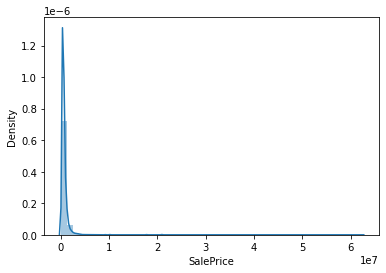

In [30]:
sns.distplot(total_df['SalePrice'])

In [134]:
total_df.describe()

Major          Minor     SalePrice        BldgNbr  \
count  173636.000000  173636.000000  1.736360e+05  173636.000000   
mean   449910.998266    1546.314906  7.450324e+05       1.032407   
std    288502.873861    2826.829118  9.175181e+05       0.470837   
min       100.000000       1.000000 -6.000000e+02       1.000000   
25%    202305.000000     115.000000  3.975000e+05       1.000000   
50%    382540.500000     325.000000  5.850000e+05       1.000000   
75%    725405.000000    1017.000000  8.400000e+05       1.000000   
max    990600.000000    9694.000000  6.250000e+07      21.000000   

       NbrLivingUnits        Stories      BldgGrade   BldgGradeVar  \
count   173636.000000  173636.000000  173636.000000  173636.000000   
mean         1.018216       1.553316       7.733719       0.009526   
std          0.160401       0.542682       1.199107       0.955274   
min          1.000000       1.000000       1.000000       0.000000   
25%          1.000000       1.000000       7.000000       0.000000   
50%          1.000000       1.500000       8.000000       0.000000   
75%          1.000000       2.000000       8.000000       0.000000   
max          6.000000       4.000000      13.000000      99.000000   

        SqFt1stFloor  SqFtHalfFloor   SqFt2ndFloor  SqFtUpperFloor  \
count  173636.000000  173636.000000  173636.000000   173636.000000   
mean     1264.390639      43.974625     567.636043       16.124341   
std       511.266915     164.625648     691.620650      100.382683   
min         0.000000       0.000000       0.000000        0.000000   
25%       950.000000       0.000000       0.000000        0.000000   
50%      1210.000000       0.000000       0.000000        0.000000   
75%      1500.000000       0.000000    1120.000000        0.000000   
max      8760.000000    2980.000000    6820.000000     2590.000000   

       SqFtUnfinFull  SqFtUnfinHalf  SqFtTotLiving  SqFtTotBasement  \
count  173636.000000  173636.000000  173636.000000    173636.000000   
mean        0.687738       0.604742    2194.726451       469.263759   
std        19.769828      18.075563    1012.276495       582.622054   
min         0.000000       0.000000       1.000000         0.000000   
25%         0.000000       0.000000    1460.000000         0.000000   
50%         0.000000       0.000000    2000.000000         0.000000   
75%         0.000000       0.000000    2730.000000       940.000000   
max      1410.000000    1320.000000   14980.000000      5610.000000   

       SqFtFinBasement  FinBasementGrade  SqFtGarageBasement  \
count    173636.000000     173636.000000       173636.000000   
mean        304.101194          2.930441           84.619416   
std         457.435684          3.647566          191.210925   
min           0.000000          0.000000            0.000000   
25%           0.000000          0.000000            0.000000   
50%           0.000000          0.000000            0.000000   
75%         580.000000          7.000000            0.000000   
max        5610.000000         20.000000         5000.000000   

       SqFtGarageAttached  SqFtOpenPorch  SqFtEnclosedPorch       SqFtDeck  \
count       173636.000000  173636.000000      173636.000000  173636.000000   
mean           268.729359      79.371150           5.878706     135.540556   
std            293.522399     134.361246          39.437246     399.091905   
min              0.000000       0.000000           0.000000       0.000000   
25%              0.000000       0.000000           0.000000       0.000000   
50%            220.000000      40.000000           0.000000       0.000000   
75%            480.000000     110.000000           0.000000     210.000000   
max           5010.000000   11570.000000        2330.000000  140000.000000   

          HeatSystem     HeatSource     BrickStone       Bedrooms  \
count  173636.000000  173636.000000  173636.000000  173636.000000   
mean        4.971049       2.113185       3.181379       3.459916   
std         1

In [135]:
total_df.corr()

Major     Minor  SalePrice   BldgNbr  \
Major                  1.000000 -0.312577  -0.013035 -0.058149   
Minor                 -0.312577  1.000000   0.014489  0.074338   
SalePrice             -0.013035  0.014489   1.000000  0.007632   
BldgNbr               -0.058149  0.074338   0.007632  1.000000   
NbrLivingUnits        -0.014661  0.018915   0.060492  0.028177   
Stories                0.027224 -0.043064   0.167973  0.006762   
BldgGrade              0.008214 -0.010975   0.355138 -0.098506   
BldgGradeVar          -0.003028  0.007560   0.078868 -0.000686   
SqFt1stFloor          -0.052053  0.127406   0.229189 -0.085935   
SqFtHalfFloor         -0.010486  0.055052   0.026065  0.013119   
SqFt2ndFloor           0.017154 -0.022836   0.256416 -0.022795   
SqFtUpperFloor         0.007881 -0.014573   0.038609  0.013458   
SqFtUnfinFull         -0.009593  0.026683   0.003379  0.001219   
SqFtUnfinHalf         -0.008558  0.017092  -0.004318 -0.000814   
SqFtTotLiving         -0.020141  0.059726   0.363713 -0.068246   
SqFtTotBasement       -0.011467  0.015387   0.128750 -0.019143   
SqFtFinBasement       -0.010882  0.009516   0.143250 -0.027963   
FinBasementGrade       0.000656 -0.021131   0.110167 -0.006055   
SqFtGarageBasement     0.000571 -0.010852   0.018109  0.033842   
SqFtGarageAttached     0.001479  0.004313   0.127371 -0.057884   
SqFtOpenPorch         -0.029079  0.101122   0.196663 -0.016341   
SqFtEnclosedPorch     -0.009304  0.036176   0.009064 -0.003820   
SqFtDeck              -0.017307  0.042386   0.049931 -0.007414   
HeatSystem             0.011381 -0.028780   0.078428 -0.081727   
HeatSource            -0.023842  0.058911  -0.015922 -0.047982   
BrickStone            -0.011412  0.006838   0.030304 -0.012802   
Bedrooms               0.004441 -0.030220   0.177582 -0.125345   
BathHalfCount          0.008172 -0.023179   0.133357 -0.023176   
Bath3qtrCount         -0.022424  0.024831   0.120717 -0.003374   
BathFullCount          0.007945  0.001535   0.201376 -0.059485   
FpSingleStory          0.007206 -0.012550   0.115958 -0.043264   
FpMultiStory          -0.004611 -0.019351   0.073750 -0.038506   
FpFreestanding        -0.034620  0.098656  -0.031383 -0.011371   
FpAdditional          -0.016648 -0.000333   0.053297 -0.028837   
YrBuilt                0.020683 -0.033413   0.101264  0.009409   
YrRenovated           -0.023070  0.044358   0.041747 -0.008471   
PcntComplete          -0.013366  0.016511   0.029762  0.096002   
PcntNetCondition      -0.002649  0.008646   0.001771  0.002606   
Condition             -0.008615  0.003247  -0.068519 -0.035689   
Township               0.010732 -0.048811   0.150102 -0.001300   
Section                0.063015 -0.021947  -0.011750 -0.028795   
Area                   0.002012  0.084714  -0.009674  0.021723   
SubArea                0.045878 -0.054250   0.003068 -0.022372   
HBUAsIfVacant         -0.015871  0.000457   0.044644  0.020632   
HBUAsImproved         -0.017737  0.010174   0.013207  0.009717   
PresentUse             0.033071 -0.009335   0.021708  0.048092   
SqFtLot               -0.050294  0.109426  -0.019632  0.663322   
WaterSystem            0.123513 -0.339964   0.020045 -0.224474   
SewerSystem            0.148385 -0.343420   0.062801 -0.104768   
Access                 0.109367 -0.267572  -0.029365  0.007346   
Topography            -0.051201  0.127953   0.070740  0.063116   
StreetSurface         -0.089916  0.212085  -0.025062  0.001341   
RestrictiveSzShape    -0.024251  0.069119   0.018183 -0.001697   
InadequateParking      0.001578 -0.012512   0.032818  0.029349   
WfntLocation          -0.043119  0.099673   0.112079  0.218163   
WfntFootage           -0.042953  0.091225  -0.011896  0.659770   
WfntBank              -0.047574  0.112309   0.087245  0.279256   
WfntPoorQuality       -0.007585  0.016106   0.000822 -0.000879   
WfntRestrictedAccess  -0.015605  0.047381   0.029447  0.001717   
TidelandShoreland     -0.019552  0.054817   0.176424  0.005325   


In [136]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df=total_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [138]:
df[(df.cc>.65) & (df.cc <1)]

cc
pairs                                        
(WfntFootage, SqFtLot)               0.990608
(SqFtFinBasement, SqFtTotBasement)   0.863616
(SqFtFinBasement, FinBasementGrade)  0.822720
(WfntBank, WfntLocation)             0.805641
(SqFtTotBasement, FinBasementGrade)  0.804763
(Stories, SqFt2ndFloor)              0.749867
(SqFtTotLiving, BldgGrade)           0.740816
(SqFtTotLiving, SqFt1stFloor)        0.681927
(SqFt2ndFloor, SqFtTotLiving)        0.675075
(BldgNbr, SqFtLot)                   0.663322
(WfntFootage, BldgNbr)               0.659770

In [ ]:
total_df.drop(columns=['WfntBank', 'WfntFootage','ExciseTaxNbr', ])

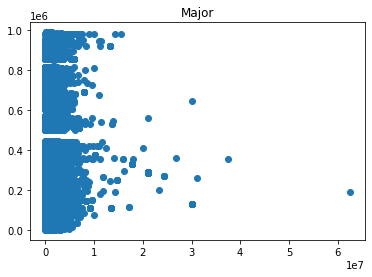

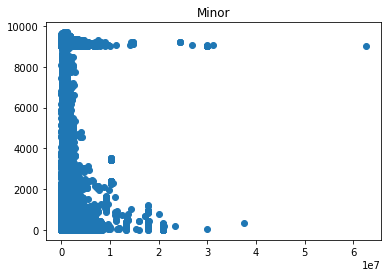

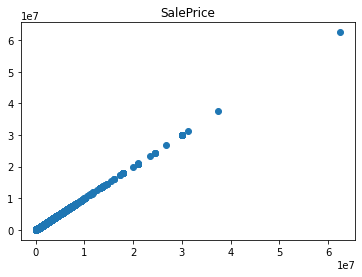

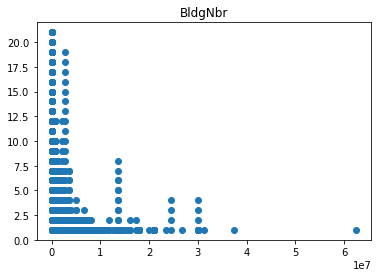

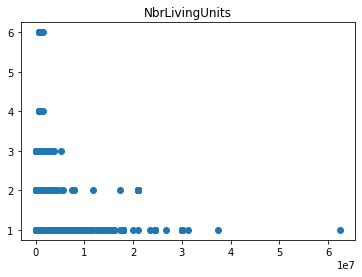

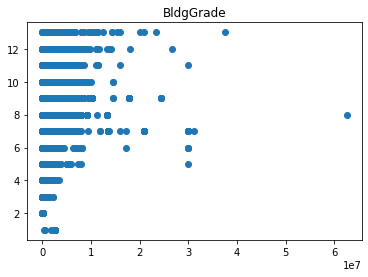

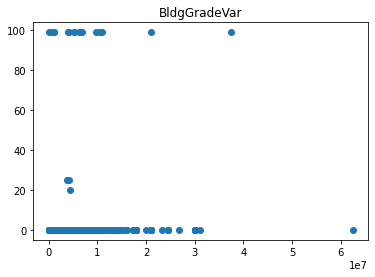

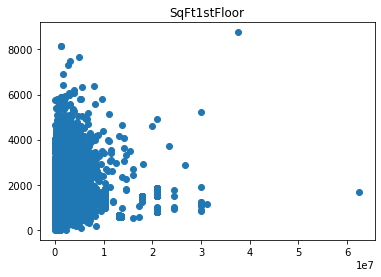

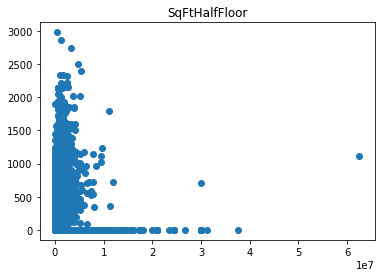

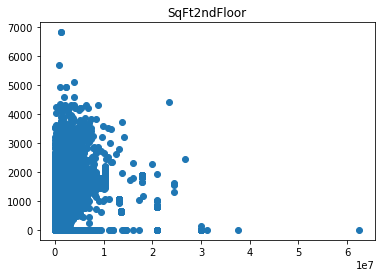

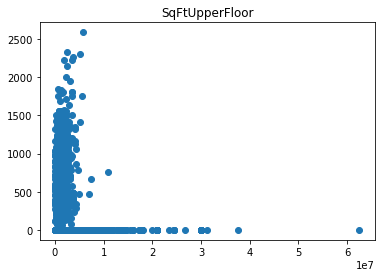

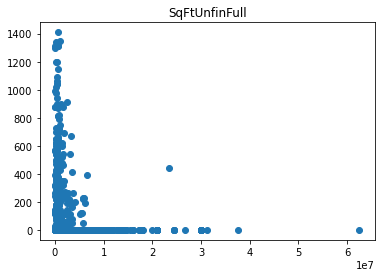

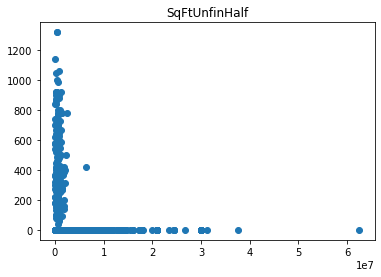

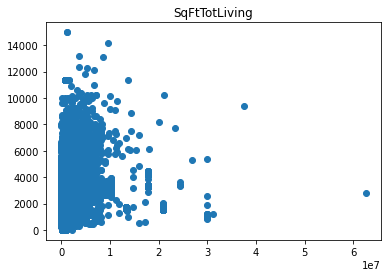

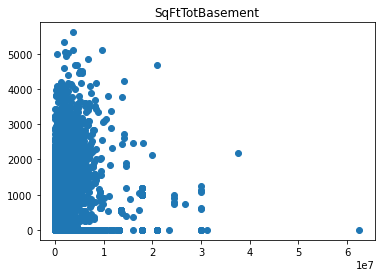

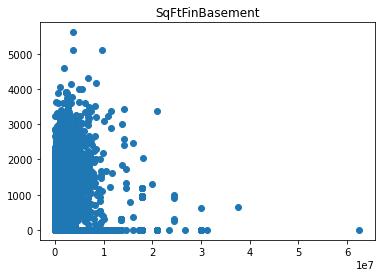

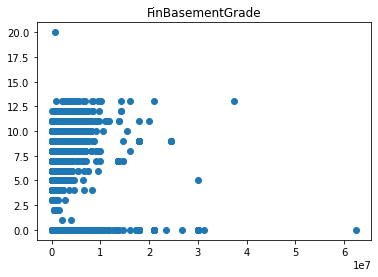

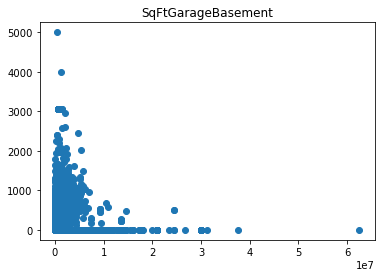

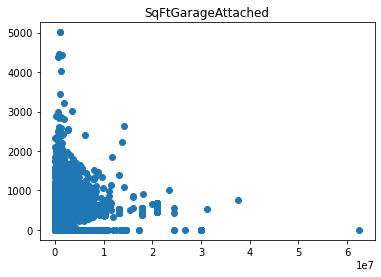

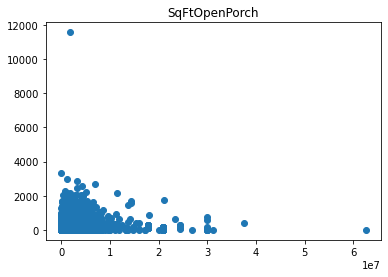

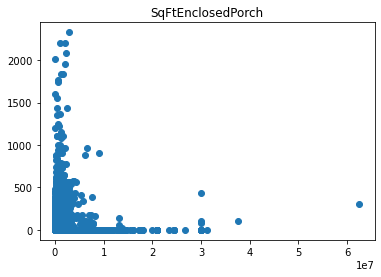

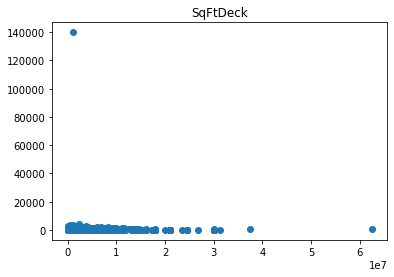

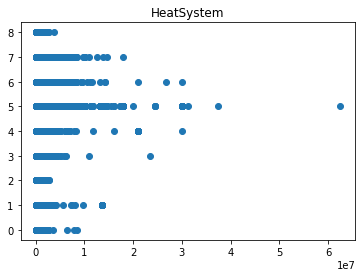

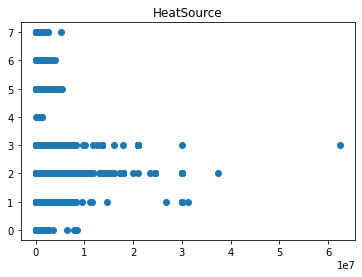

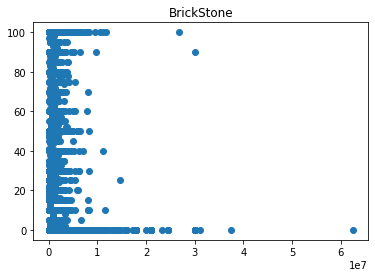

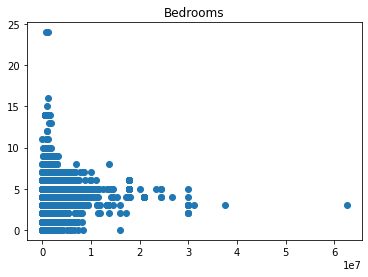

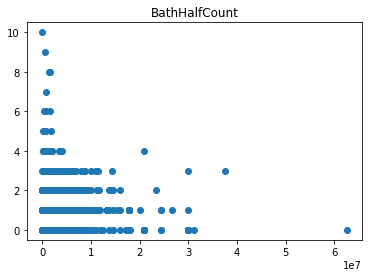

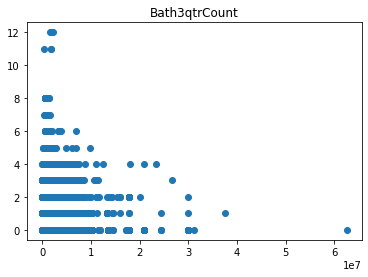

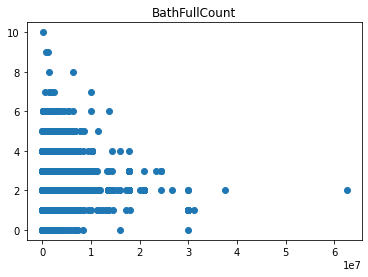

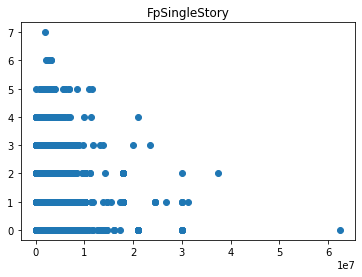

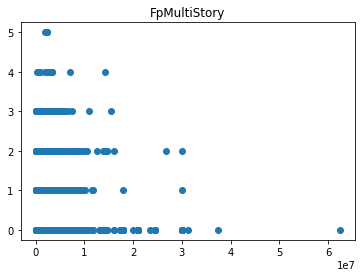

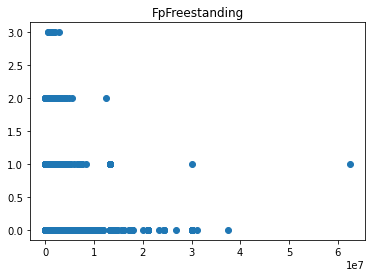

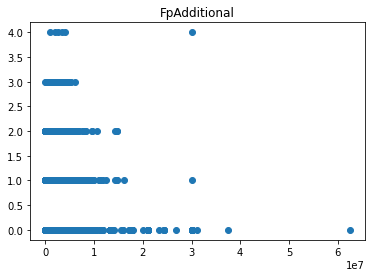

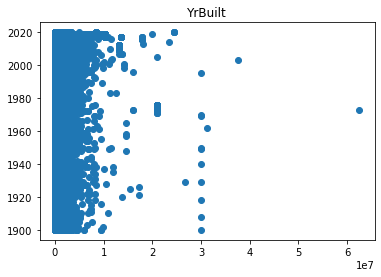

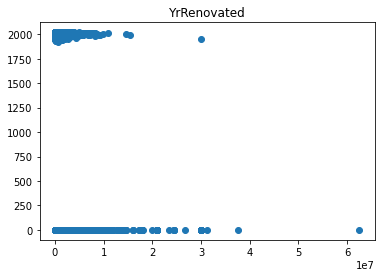

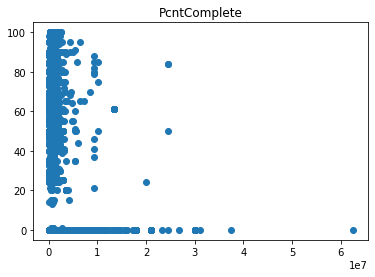

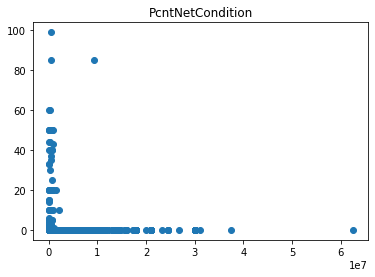

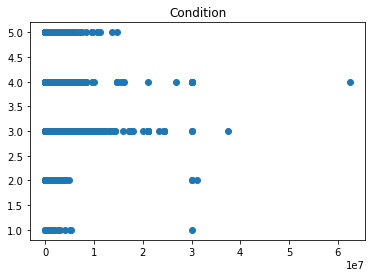

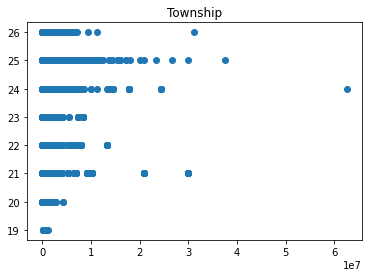

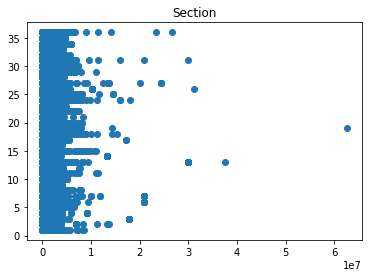

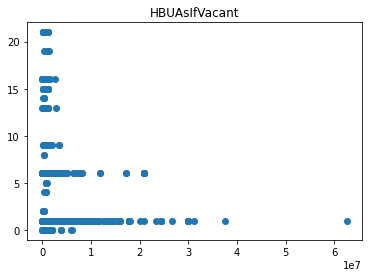

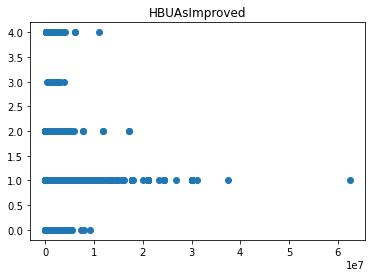

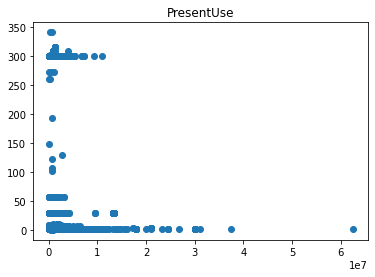

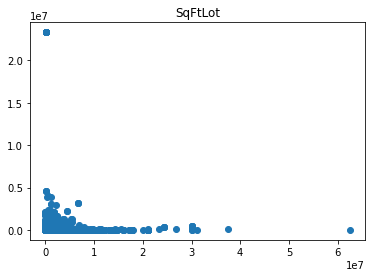

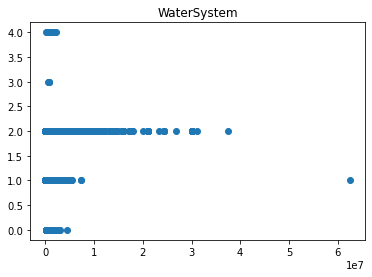

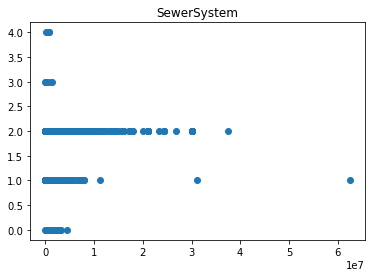

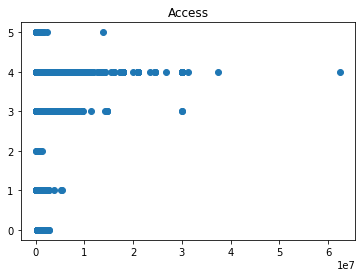

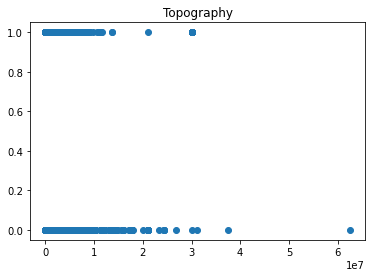

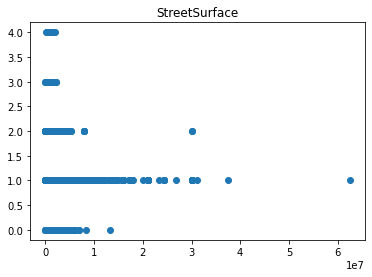

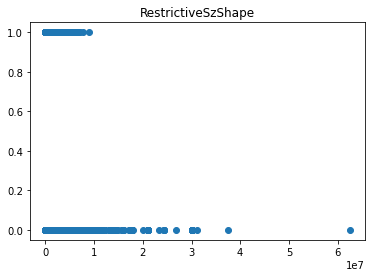

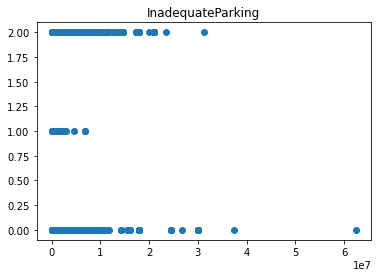

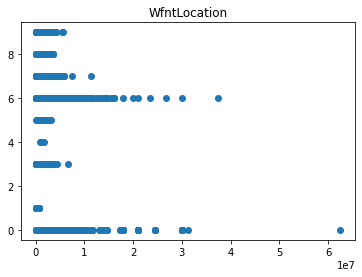

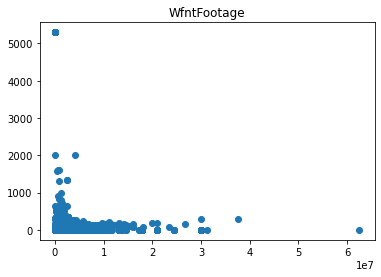

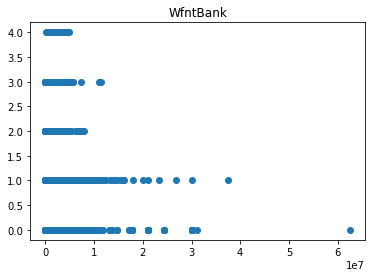

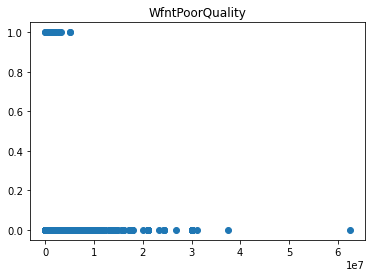

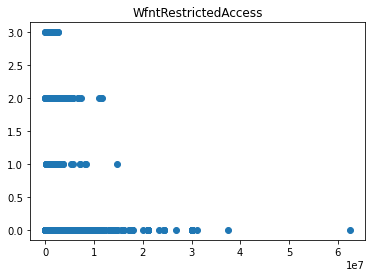

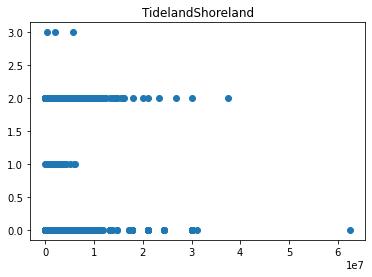

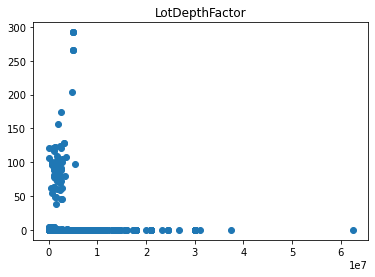

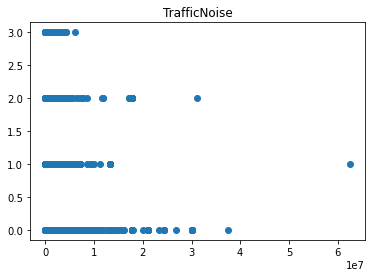

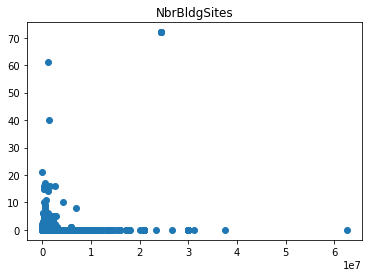

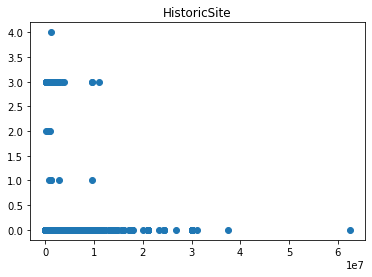

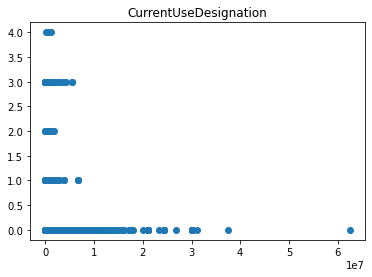

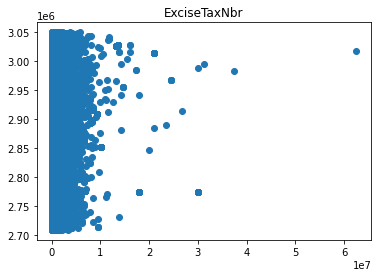

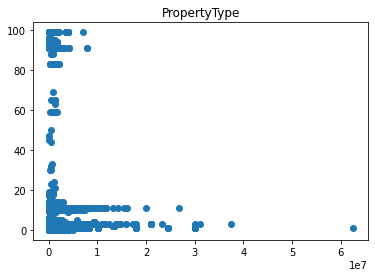

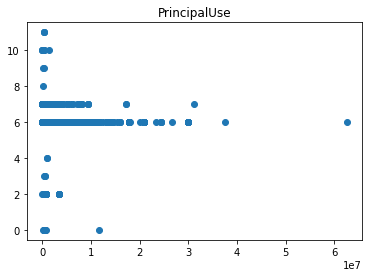

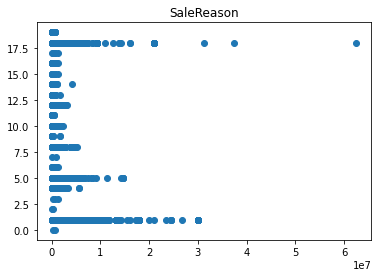

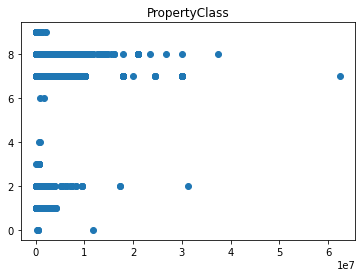

In [146]:
for col in total_df.columns:
    if total_df[col].dtype == 'int64':
        plt.scatter(total_df['SalePrice'], total_df[col])
        plt.title(col)
        plt.show()

In [31]:
total_df['SalePrice'].dtype

dtype('int64')

In [32]:
total_df['SalePrice'].quantile([.1,.9])

0.1     283000.0
0.9    1250000.0
Name: SalePrice, dtype: float64

In [33]:
total_df = total_df[(total_df['SalePrice']>283000)&(total_df['SalePrice']<1250000)]

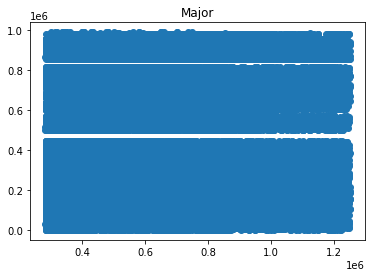

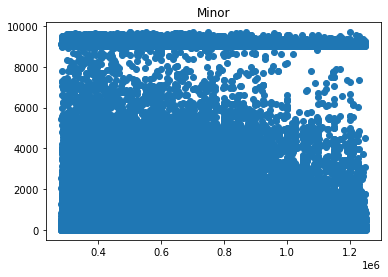

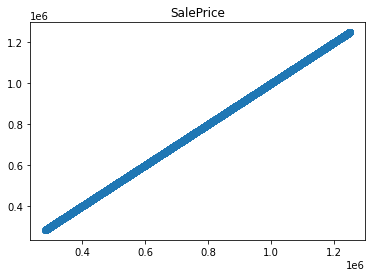

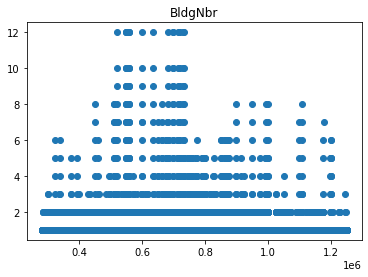

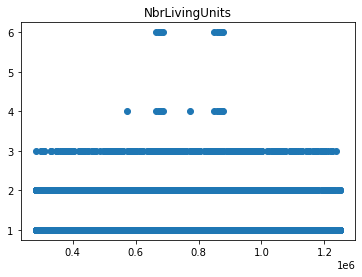

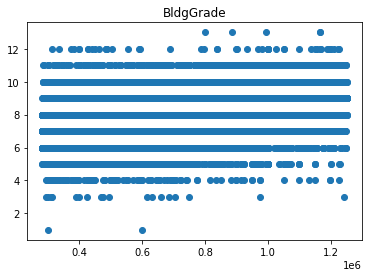

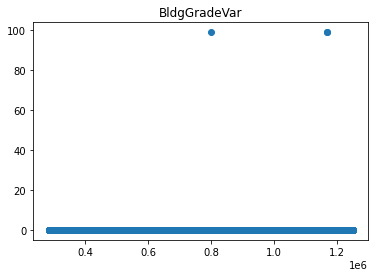

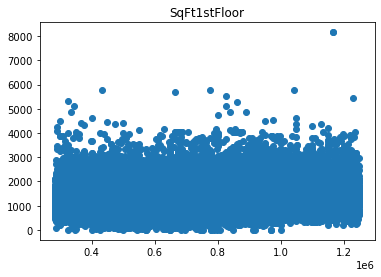

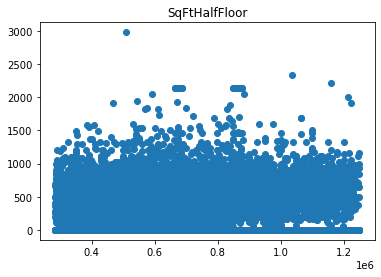

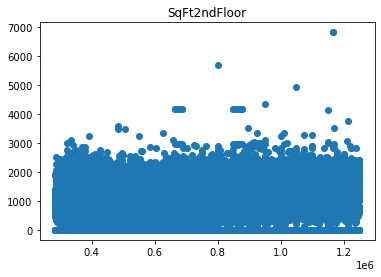

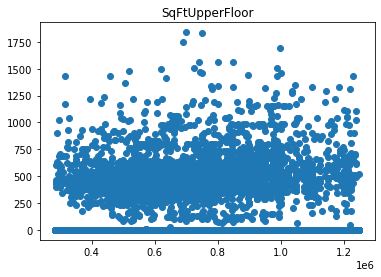

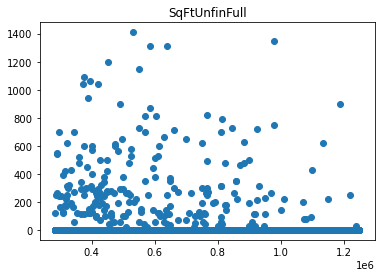

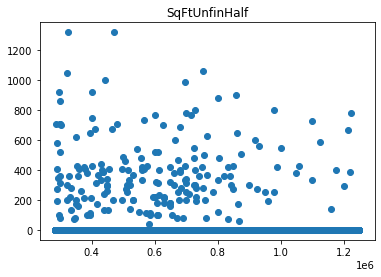

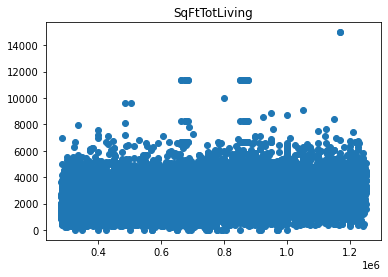

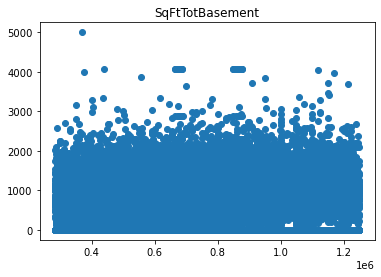

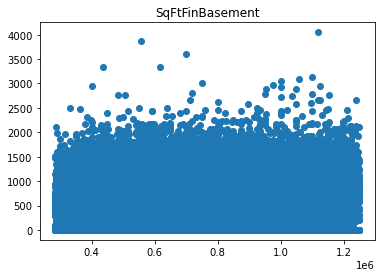

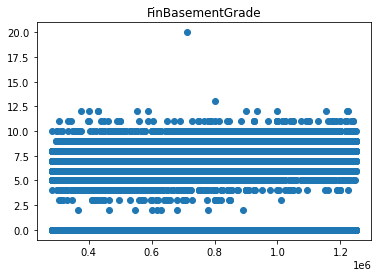

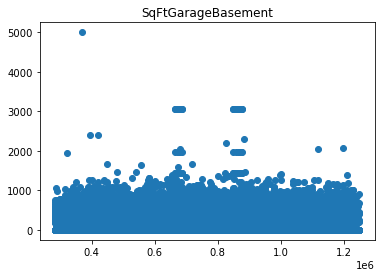

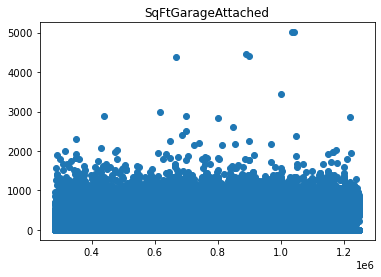

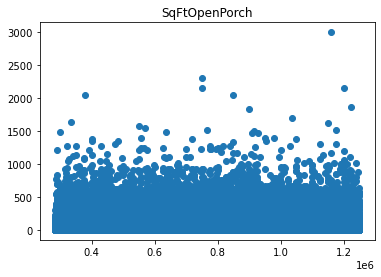

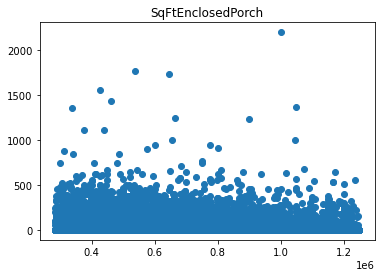

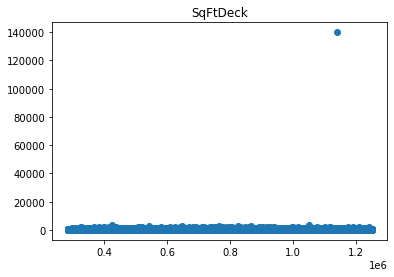

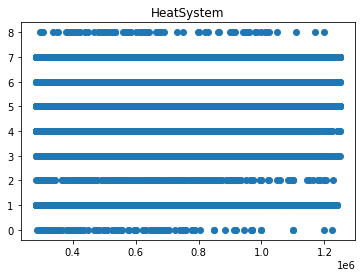

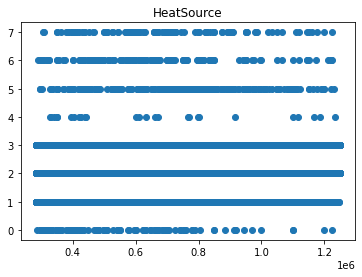

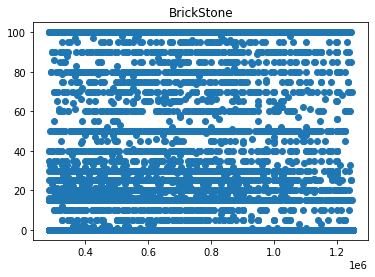

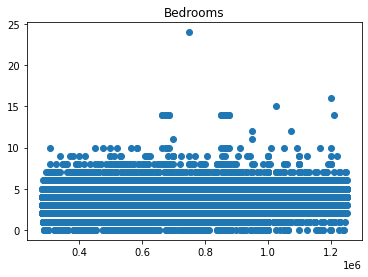

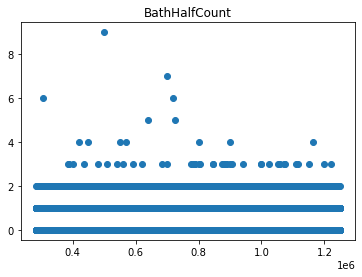

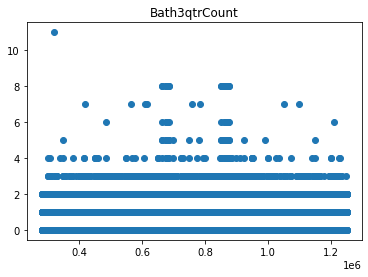

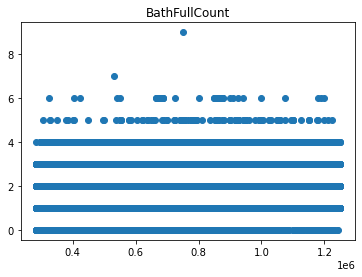

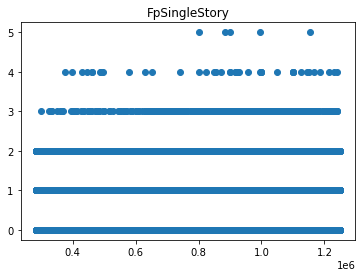

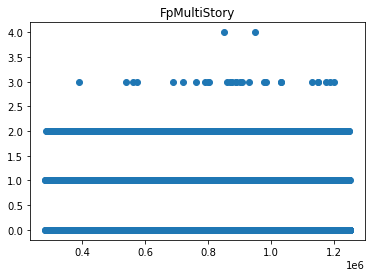

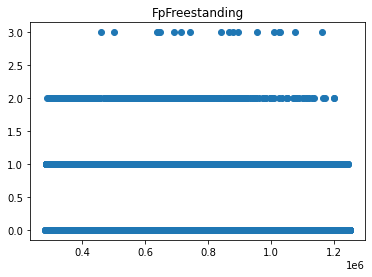

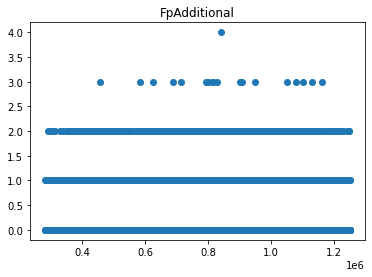

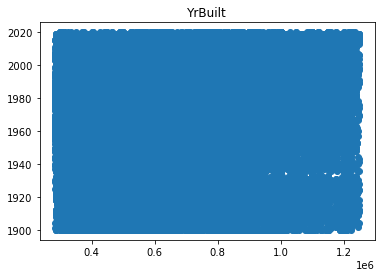

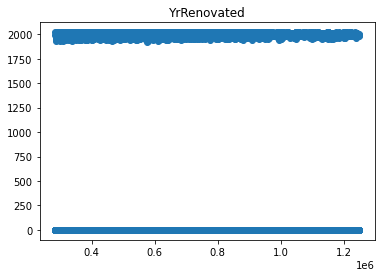

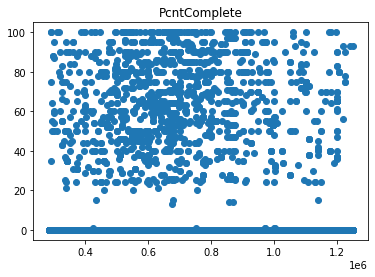

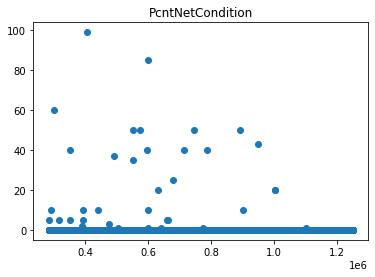

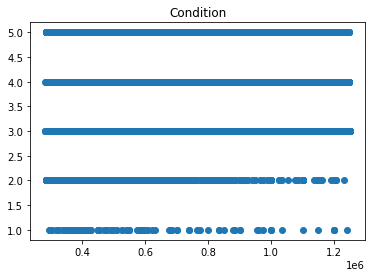

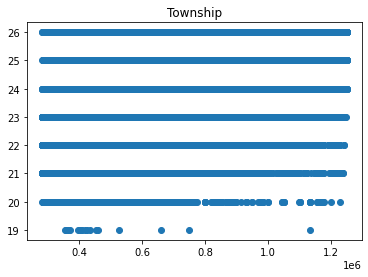

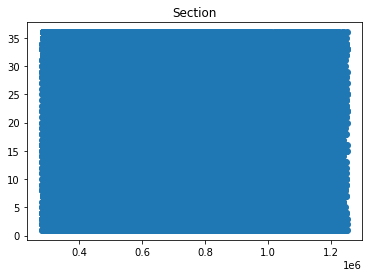

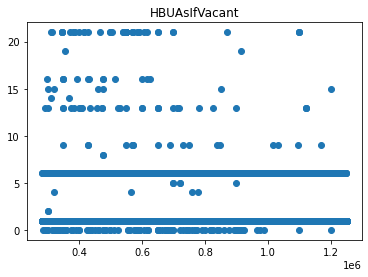

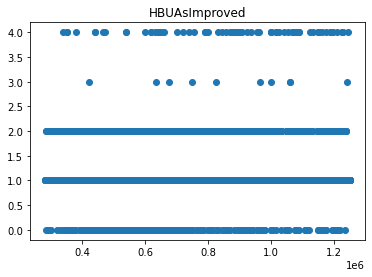

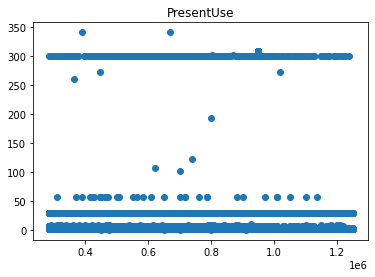

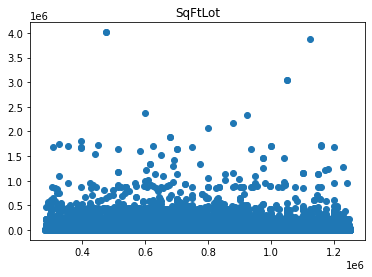

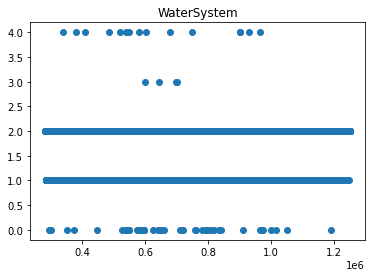

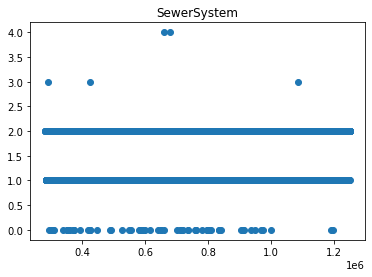

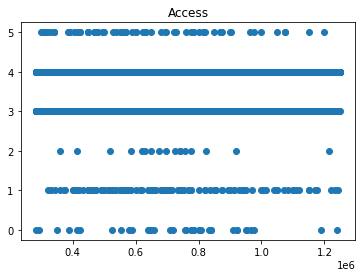

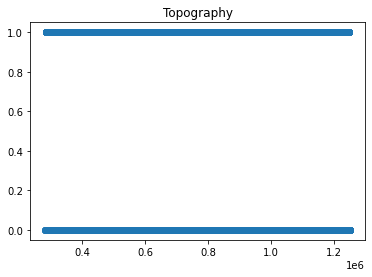

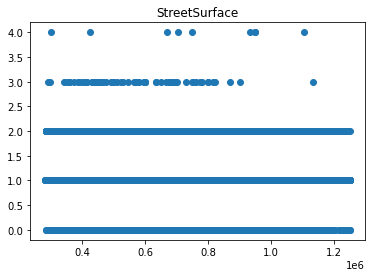

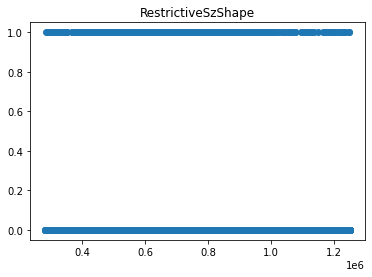

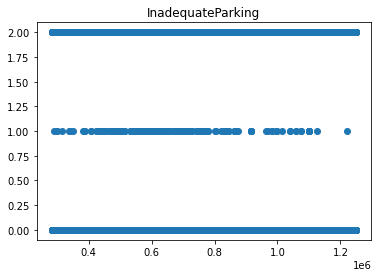

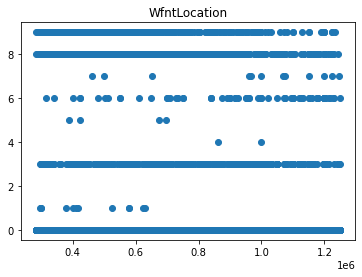

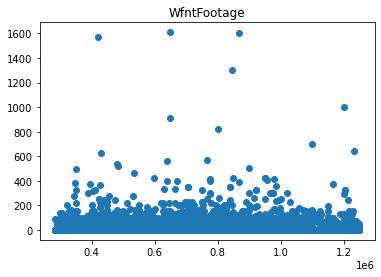

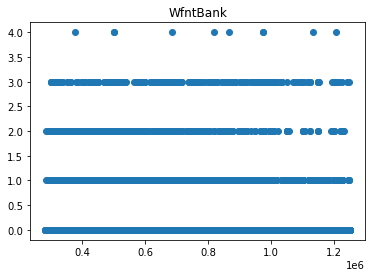

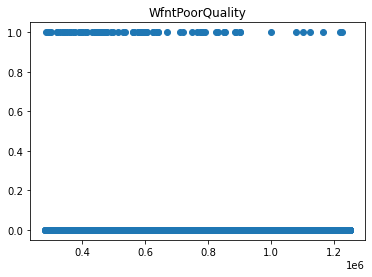

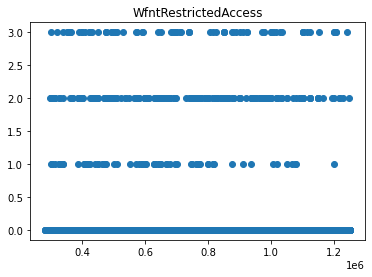

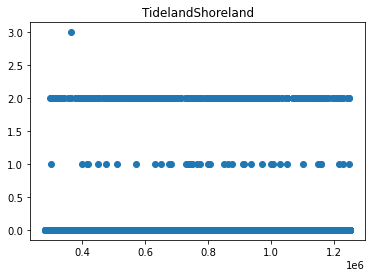

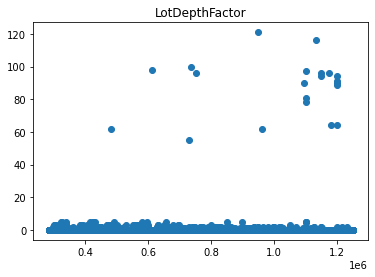

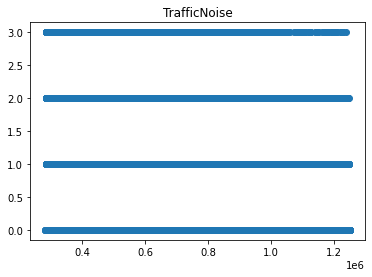

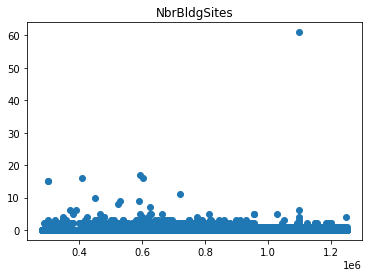

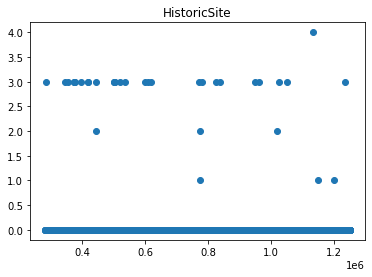

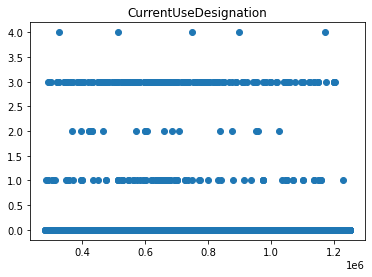

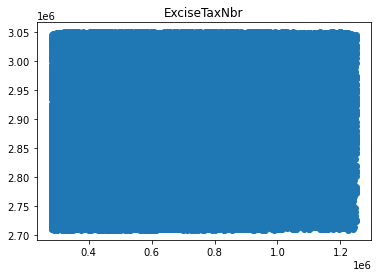

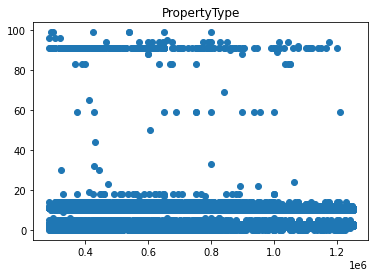

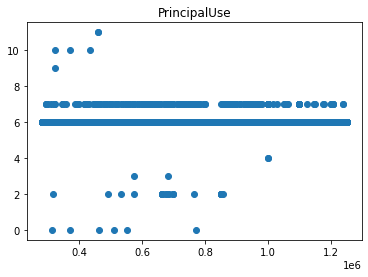

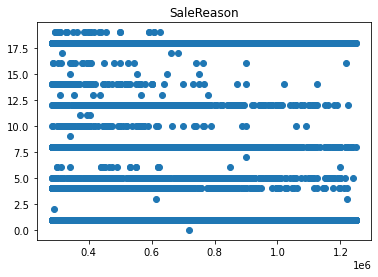

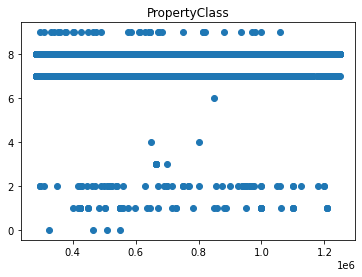

In [34]:
for col in total_df.columns:
    if total_df[col].dtype == 'int64':
        plt.scatter(total_df['SalePrice'], total_df[col])
        plt.title(col)
        plt.show()

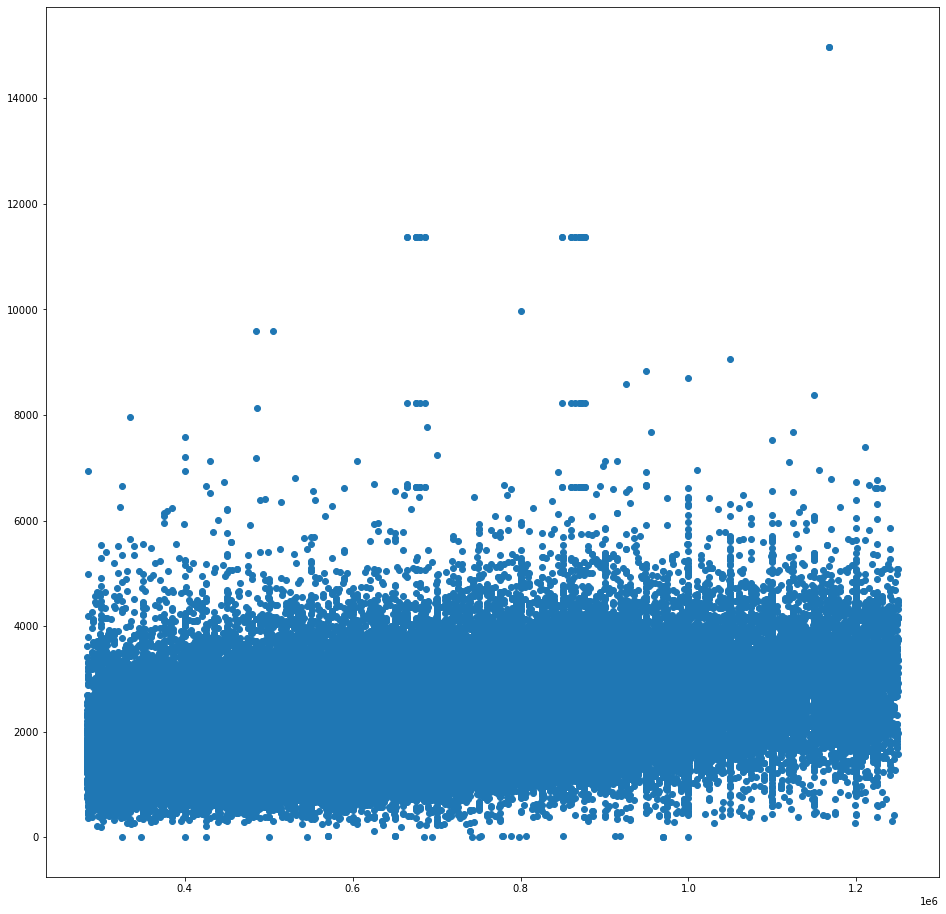

In [35]:

plt.figure(figsize=(16,16))
plt.scatter(total_df['SalePrice'], total_df['SqFtTotLiving'], cmap=total_df['DistrictName'])

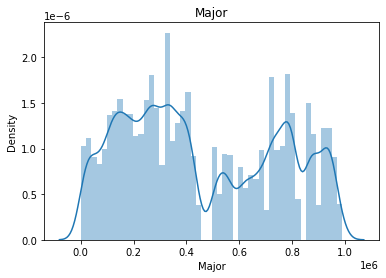

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


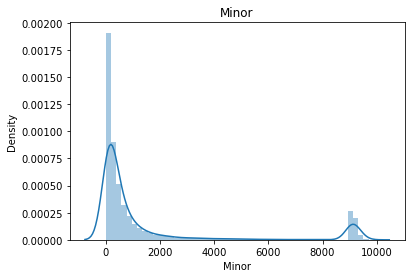

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


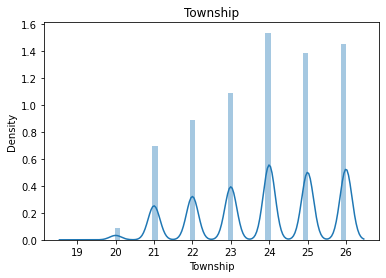

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


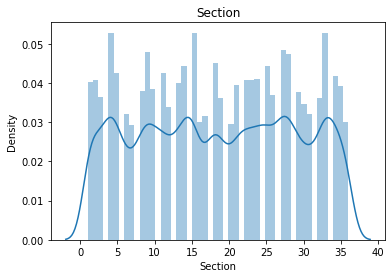

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


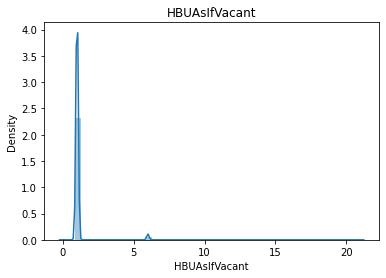

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


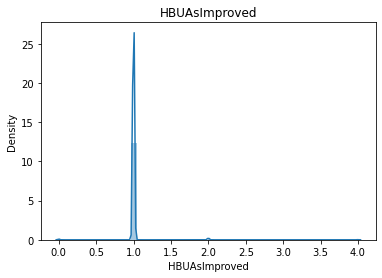

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


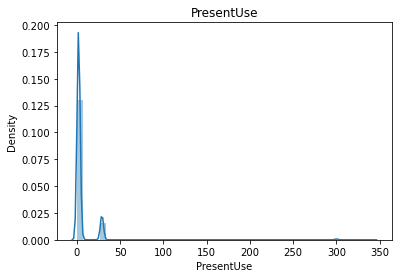

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


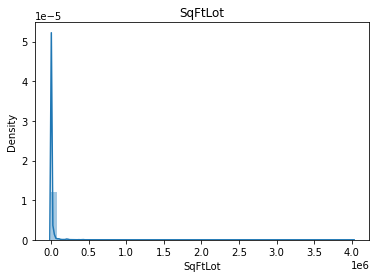

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


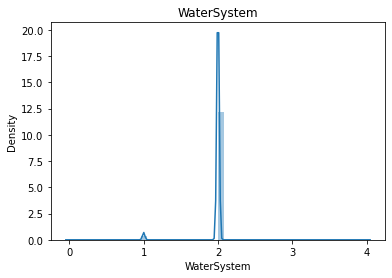

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


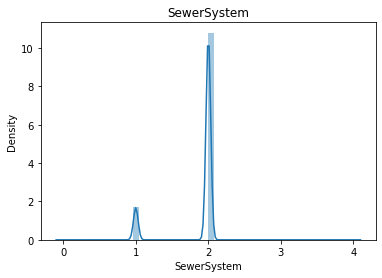

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


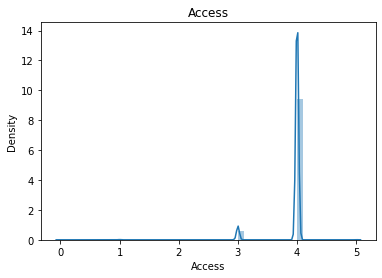

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


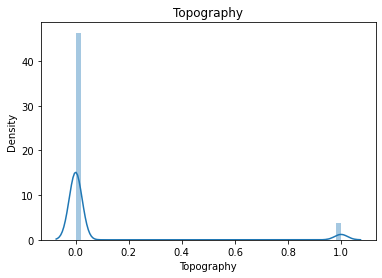

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


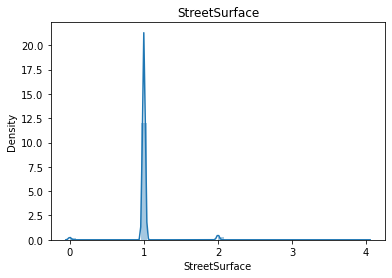

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


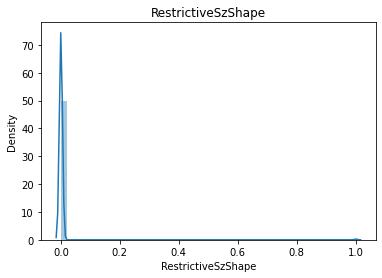

C:\Users\Andrew\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


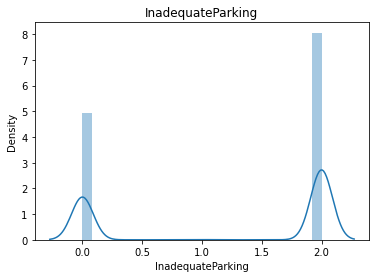

KeyError: 'MtRainier'

In [155]:
for col in parcel_df.columns:
    if parcel_df[col].dtype == 'int64':
        sns.distplot(total_df[col])
        plt.title(col)
        plt.show()
        

In [36]:
list(total_df.columns)

['Major',
 'Minor',
 'SalePrice',
 'BldgNbr',
 'NbrLivingUnits',
 'Address',
 'BuildingNumber',
 'StreetName',
 'ZipCode',
 'Stories',
 'BldgGrade',
 'BldgGradeVar',
 'SqFt1stFloor',
 'SqFtHalfFloor',
 'SqFt2ndFloor',
 'SqFtUpperFloor',
 'SqFtUnfinFull',
 'SqFtUnfinHalf',
 'SqFtTotLiving',
 'SqFtTotBasement',
 'SqFtFinBasement',
 'FinBasementGrade',
 'SqFtGarageBasement',
 'SqFtGarageAttached',
 'DaylightBasement',
 'SqFtOpenPorch',
 'SqFtEnclosedPorch',
 'SqFtDeck',
 'HeatSystem',
 'HeatSource',
 'BrickStone',
 'ViewUtilization',
 'Bedrooms',
 'BathHalfCount',
 'Bath3qtrCount',
 'BathFullCount',
 'FpSingleStory',
 'FpMultiStory',
 'FpFreestanding',
 'FpAdditional',
 'YrBuilt',
 'YrRenovated',
 'PcntComplete',
 'PcntNetCondition',
 'Condition',
 'Township',
 'Section',
 'QuarterSection',
 'PropType',
 'Area',
 'SubArea',
 'DistrictName',
 'CurrentZoning',
 'HBUAsIfVacant',
 'HBUAsImproved',
 'PresentUse',
 'SqFtLot',
 'WaterSystem',
 'SewerSystem',
 'Access',
 'Topography',
 'StreetSur

In [159]:
corr = total_df.corr()

In [160]:
corr['SalePrice']

Major                    0.014490
Minor                    0.013796
SalePrice                1.000000
BldgNbr                  0.021245
NbrLivingUnits           0.041938
Stories                  0.239613
BldgGrade                0.489104
BldgGradeVar             0.008528
SqFt1stFloor             0.182677
SqFtHalfFloor            0.082832
SqFt2ndFloor             0.270542
SqFtUpperFloor           0.079267
SqFtUnfinFull           -0.004876
SqFtUnfinHalf           -0.001537
SqFtTotLiving            0.419743
SqFtTotBasement          0.175747
SqFtFinBasement          0.172099
FinBasementGrade         0.171816
SqFtGarageBasement       0.050007
SqFtGarageAttached       0.084541
SqFtOpenPorch            0.162698
SqFtEnclosedPorch        0.008719
SqFtDeck                 0.080101
HeatSystem               0.144833
HeatSource              -0.042862
BrickStone               0.068343
Bedrooms                 0.194552
BathHalfCount            0.105293
Bath3qtrCount            0.134267
BathFullCount 

In [37]:
len(total_df[total_df.duplicated(subset=['SalePrice','Major', 'Minor'], keep=False)])

5517

In [38]:
len(total_df)

138678

In [39]:
total_df = total_df.drop_duplicates(subset=['SalePrice','Major', 'Minor'], keep='last')

In [40]:
len(total_df)

135683

Features - Heat source (Oil, Gas, electricity, Oil/solar, gas/solar, electricity/solar, other)
Heat system - Floor wall, gravity, radiant, elec BB, forced air, hot water, heat pump, other
bldggrade - 
condition - 
reinstate lot square footage - 
water system - 
sewer system -
bedrooms - 
fireplace
year renovated
square feet deck - 
square feet enclosed porch - 
square feet open porch
square feet garage (any)  -
square feet 
basement grade




In [176]:
total_df.columns

Index(['Major', 'Minor', 'SalePrice', 'BldgNbr', 'NbrLivingUnits', 'Address',
       'BuildingNumber', 'StreetName', 'ZipCode', 'Stories', 'BldgGrade',
       'BldgGradeVar', 'SqFt1stFloor', 'SqFtHalfFloor', 'SqFt2ndFloor',
       'SqFtUpperFloor', 'SqFtUnfinFull', 'SqFtUnfinHalf', 'SqFtTotLiving',
       'SqFtTotBasement', 'SqFtFinBasement', 'FinBasementGrade',
       'SqFtGarageBasement', 'SqFtGarageAttached', 'DaylightBasement',
       'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck', 'HeatSystem',
       'HeatSource', 'BrickStone', 'ViewUtilization', 'Bedrooms',
       'BathHalfCount', 'Bath3qtrCount', 'BathFullCount', 'FpSingleStory',
       'FpMultiStory', 'FpFreestanding', 'FpAdditional', 'YrBuilt',
       'YrRenovated', 'PcntComplete', 'PcntNetCondition', 'Condition',
       'Township', 'Section', 'QuarterSection', 'PropType', 'Area', 'SubArea',
       'DistrictName', 'CurrentZoning', 'HBUAsIfVacant', 'HBUAsImproved',
       'PresentUse', 'SqFtLot', 'WaterSystem', 'SewerSystem'

In [177]:
total_df['BldgGradeVar'].value_counts()

0     135681
99         2
Name: BldgGradeVar, dtype: int64

In [41]:
# drop this column
len(total_df[total_df.duplicated(subset=['SalePrice','Address'], keep=False)])

141

In [180]:
len(total_df[total_df['SalePrice']==0])

0

In [42]:
len(total_df[total_df['PropertyType']==11])

57820

In [43]:
total_df['DocumentDate'].dtypes

dtype('O')

In [44]:
total_df['Date'] = pd.to_datetime(total_df['DocumentDate'], format='%m/%d/%Y')
total_df['Date'] = pd.DatetimeIndex(total_df['Date']).year

In [45]:
total_df['Date'] = pd.DatetimeIndex(total_df['Date']).year

In [46]:
total_df.head()

Major  Minor  SalePrice  BldgNbr  NbrLivingUnits  \
6    9830    160    1229000        1               1   
9   10050    350     347000        1               1   
10  10050    380     445000        1               1   
11  10050    380     311000        1               1   
13  10060    810     295000        1               1   

                       Address BuildingNumber                 StreetName  \
6   1861   297TH WAY SE  98024          1861   297TH                       
9     2423  S 354TH ST   98003          2423   354TH                       
10    2435  S 354TH ST   98003          2435   354TH                       
11    2435  S 354TH ST   98003          2435   354TH                       
13   33415   28TH PL SW  98023          33415  28TH                        

   ZipCode  Stories  BldgGrade  BldgGradeVar  SqFt1stFloor  SqFtHalfFloor  \
6    98024      2.0         10             0          2210              0   
9    98003      2.0          7             0           920              0   
10   98003      1.0          7             0          1480              0   
11   98003      1.0          7             0          1480              0   
13   98023      1.0          7             0           900              0   

    SqFt2ndFloor  SqFtUpperFloor  SqFtUnfinFull  SqFtUnfinHalf  SqFtTotLiving  \
6           1860               0              0              0           4070   
9            760               0              0              0           1680   
10             0               0              0              0           1480   
11             0               0              0              0           1480   
13             0               0              0              0           1330   

    SqFtTotBasement  SqFtFinBasement  FinBasementGrade  SqFtGarageBasement  \
6                 0                0                 0                   0   
9                 0                0                 0                   0   
10                0                0                 0                   0   
11                0                0                 0                   0   
13              430              430                 7                   0   

    SqFtGarageAttached DaylightBasement  SqFtOpenPorch  SqFtEnclosedPorch  \
6                 1000                N            690                  0   
9                  440                             240                  0   
10                 440                              80                  0   
11                 440                              80                  0   
13                 480                Y             70                  0   

    SqFtDeck  HeatSystem  HeatSource  BrickStone ViewUtilization  Bedrooms  \
6          0           5           2           0               N         4   
9        286           5           2           0                         4   
10       120           5           2           0                         3   
11       120           5           2           0                         3   
13         0           5           2           0                         3   

    BathHalfCount  Bath3qtrCount  BathFullCount  FpSingleStory  FpMultiStory  \
6               1              0              3              2             0   
9               1              0              2              0             1   
10              0              0              2              1             0   
11              0              0              2              1             0   
13              0              1              1              1             0   

    FpFreestanding  FpAdditional  YrBuilt  YrRenovated  PcntComplete  \
6                0             0     2013            0             0   
9                0             0     1994            0             0   
10               0             0     1994            0             0   
11               0             0     1994            0             0   
13               0

In [47]:
data_2019 = total_df.copy()

In [48]:
data_2019 = data_2019[data_2019['Date'] == 2019]

In [49]:
data_2019.reset_index(drop=True)

Major  Minor  SalePrice  BldgNbr  NbrLivingUnits  \
0       10050    380     445000        1               1   
1       10050    380     311000        1               1   
2       18800     95     730000        1               1   
3       18880    210     888679        1               1   
4       19110    145     800000        1               1   
...       ...    ...        ...      ...             ...   
24097  195440    120     759990        1               1   
24098  195970   1472     849990        1               1   
24099  197220    269     765000        1               1   
24100  197220   1902     584355        1               1   
24101  197220   5172     849950        1               1   

                             Address BuildingNumber  \
0           2435  S 354TH ST   98003          2435    
1           2435  S 354TH ST   98003          2435    
2      1602   LAKEVIEW BLVD E  98102          1602    
3                3410  SE 18TH ST             3410    
4          4512   90TH AVE SE  98040          4512    
...                              ...            ...   
24097       22131  NE 9TH PL   98074          22131   
24098        2857   FRANKLIN AVE E            2857    
24099        3616   PALATINE AVE N            3616    
24100     3816   WINSLOW PL N  98103          3816    
24101            11 B W DRAVUS ST             11      

                      StreetName ZipCode  Stories  BldgGrade  BldgGradeVar  \
0      354TH                       98003      1.0          7             0   
1      354TH                       98003      1.0          7             0   
2      LAKEVIEW                    98102      2.0          9             0   
3      18TH                          NaN      2.0          9             0   
4      90TH                        98040      1.0          8             0   
...                          ...     ...      ...        ...           ...   
24097  9TH                         98074      2.0          8             0   
24098  FRANKLIN                      NaN      2.0          9             0   
24099  PALATINE                      NaN      2.0          8             0   
24100  WINSLOW                     98103      3.0          8             0   
24101  DRAVUS                        NaN      3.0          8             0   

       SqFt1stFloor  SqFtHalfFloor  SqFt2ndFloor  SqFtUpperFloor  \
0              1480              0             0               0   
1              1480              0             0               0   
2               660              0           595               0   
3              1602              0          1991               0   
4              2290              0             0               0   
...             ...            ...           ...             ...   
24097          1250              0           760               0   
24098           490              0           510               0   
24099           440              0           440               0   
24100           150              0           450             430   
24101           220              0           510             380   

       SqFtUnfinFull  SqFtUnfinHalf  SqFtTotLiving  SqFtTotBasement  \
0                  0              0           1480                0   
1                  0              0           1480                0   
2                  0              0           1540              380   
3                  0              0           3593                0   
4                  0              0           2290                0   
...              ...            ...            ...              ...   
24097              0              0           2010                0   
24098              0              0           1510              510   
24099              0              0           1270              390   
24100              0              0           1030                0   
24101              0              0           1600              490   

       SqFtFinBasem

In [50]:
len(data_2019[data_2019['PropertyType']==11])

15804

In [51]:
data_2019['PropertyType'].value_counts()

11    15804
3      5857
2      1101
10     1007
12       92
14       92
1        36
0        35
91       23
5        20
18       15
13        8
4         3
94        2
59        2
6         2
83        1
23        1
96        1
Name: PropertyType, dtype: int64

For this project I am only interested in improvements homeowners can make to improve the price of their property, for this reason it makes sense to keep only property type 11 - which according to the lookup_df is Household, single family unit.

In [55]:
df = data_2019.copy()

In [56]:
df = df[df['PropertyType'] == 11] 

In [57]:
len(df)

15804

In [58]:
df.isna().sum()

Major                        0
Minor                        0
SalePrice                    0
BldgNbr                      0
NbrLivingUnits               0
Address                      0
BuildingNumber               0
StreetName                   0
ZipCode                   1943
Stories                      0
BldgGrade                    0
BldgGradeVar                 0
SqFt1stFloor                 0
SqFtHalfFloor                0
SqFt2ndFloor                 0
SqFtUpperFloor               0
SqFtUnfinFull                0
SqFtUnfinHalf                0
SqFtTotLiving                0
SqFtTotBasement              0
SqFtFinBasement              0
FinBasementGrade             0
SqFtGarageBasement           0
SqFtGarageAttached           0
DaylightBasement             0
SqFtOpenPorch                0
SqFtEnclosedPorch            0
SqFtDeck                     0
HeatSystem                   0
HeatSource                   0
BrickStone                   0
ViewUtilization              0
Bedrooms

too many of these columns don't necessarily relate to home improvements, I will look to remove such columns now. 


In [59]:
col_to_drop = ['SaleReason', 'BuyerName', 'SellerName', 'ExciseTaxNbr',\
               'AdjacentGolfFairway', 'NativeGrowthProtEsmt', 'OtherDesignation',\
              'PropType', 'AdjacentGreenbelt', 'HistoricSite', 'OtherProblems', 'WfntLocation', 'TidelandShoreland',\
              'HistoricSite', 'DeedRestrictions', 'PresentUse', 'StreetSurface', 'WfntPoorQuality', 'WfntProximityInfluence',\
              'Topography', 'PowerLines', 'CurrentZoning','PcntNetCondition', 'ViewUtilization']

In [214]:
df.head()

Major  Minor  SalePrice  BldgNbr  NbrLivingUnits  \
10  10050    380     445000        1               1   
11  10050    380     311000        1               1   
21  18800     95     730000        1               1   
28  19110    310    1055700        1               1   
34  17900   1770     565000        1               1   

                          Address BuildingNumber                 StreetName  \
10       2435  S 354TH ST   98003          2435   354TH                       
11       2435  S 354TH ST   98003          2435   354TH                       
21  1602   LAKEVIEW BLVD E  98102          1602   LAKEVIEW                    
28      4520   88TH AVE SE  98040          4520   88TH                        
34      12207   50TH AVE S  98168          12207  50TH                        

   ZipCode  Stories  BldgGrade  BldgGradeVar  SqFt1stFloor  SqFtHalfFloor  \
10   98003      1.0          7             0          1480              0   
11   98003      1.0          7             0          1480              0   
21   98102      2.0          9             0           660              0   
28   98040      1.0          8             0          1390              0   
34   98168      1.0          8             0          1350              0   

    SqFt2ndFloor  SqFtUpperFloor  SqFtUnfinFull  SqFtUnfinHalf  SqFtTotLiving  \
10             0               0              0              0           1480   
11             0               0              0              0           1480   
21           595               0              0              0           1540   
28             0               0              0              0           2780   
34             0               0              0              0           2230   

    SqFtTotBasement  SqFtFinBasement  FinBasementGrade  SqFtGarageBasement  \
10                0                0                 0                   0   
11                0                0                 0                   0   
21              380              285                 8                   0   
28             1390             1390                 7                   0   
34             1280              880                 7                 400   

    SqFtGarageAttached DaylightBasement  SqFtOpenPorch  SqFtEnclosedPorch  \
10                 440                              80                  0   
11                 440                              80                  0   
21                   0                Y              0                  0   
28                   0                Y              0                  0   
34                  80                Y             40                  0   

    SqFtDeck  HeatSystem  HeatSource  BrickStone ViewUtilization  Bedrooms  \
10       120           5           2           0                         3   
11       120           5           2           0                         3   
21       155           1           3           0               Y         3   
28       100           5           2           0               N         6   
34       100           5           3           0                         3   

    BathHalfCount  Bath3qtrCount  BathFullCount  FpSingleStory  FpMultiStory  \
10              0              0              2              1             0   
11              0              0              2              1             0   
21              1              1              1              0             1   
28              0              1              1              0             1   
34              0              0              2              1             0   

    FpFreestanding  FpAdditional  YrBuilt  YrRenovated  PcntComplete  \
10               0             0     1994            0             0   
11               0             0     1994            0             0   
21               0             0     1984            0             0   
28               0             1     1967            0             0   


R    15804
Name: PropType, dtype: int64

In [216]:
df.PcntNetCondition.value_counts()

0     15800
10        2
3         1
1         1
Name: PcntNetCondition, dtype: int64

drop that column

In [217]:
df.ViewUtilization.value_counts()

     8135
N    7421
Y     248
Name: ViewUtilization, dtype: int64

drop that column

In [60]:
df.drop(columns=col_to_drop, inplace=True)

In [61]:
df.head()

Major  Minor  SalePrice  BldgNbr  NbrLivingUnits  \
10  10050    380     445000        1               1   
11  10050    380     311000        1               1   
21  18800     95     730000        1               1   
28  19110    310    1055700        1               1   
34  17900   1770     565000        1               1   

                          Address BuildingNumber                 StreetName  \
10       2435  S 354TH ST   98003          2435   354TH                       
11       2435  S 354TH ST   98003          2435   354TH                       
21  1602   LAKEVIEW BLVD E  98102          1602   LAKEVIEW                    
28      4520   88TH AVE SE  98040          4520   88TH                        
34      12207   50TH AVE S  98168          12207  50TH                        

   ZipCode  Stories  BldgGrade  BldgGradeVar  SqFt1stFloor  SqFtHalfFloor  \
10   98003      1.0          7             0          1480              0   
11   98003      1.0          7             0          1480              0   
21   98102      2.0          9             0           660              0   
28   98040      1.0          8             0          1390              0   
34   98168      1.0          8             0          1350              0   

    SqFt2ndFloor  SqFtUpperFloor  SqFtUnfinFull  SqFtUnfinHalf  SqFtTotLiving  \
10             0               0              0              0           1480   
11             0               0              0              0           1480   
21           595               0              0              0           1540   
28             0               0              0              0           2780   
34             0               0              0              0           2230   

    SqFtTotBasement  SqFtFinBasement  FinBasementGrade  SqFtGarageBasement  \
10                0                0                 0                   0   
11                0                0                 0                   0   
21              380              285                 8                   0   
28             1390             1390                 7                   0   
34             1280              880                 7                 400   

    SqFtGarageAttached DaylightBasement  SqFtOpenPorch  SqFtEnclosedPorch  \
10                 440                              80                  0   
11                 440                              80                  0   
21                   0                Y              0                  0   
28                   0                Y              0                  0   
34                  80                Y             40                  0   

    SqFtDeck  HeatSystem  HeatSource  BrickStone  Bedrooms  BathHalfCount  \
10       120           5           2           0         3              0   
11       120           5           2           0         3              0   
21       155           1           3           0         3              1   
28       100           5           2           0         6              0   
34       100           5           3           0         3              0   

    Bath3qtrCount  BathFullCount  FpSingleStory  FpMultiStory  FpFreestanding  \
10              0              2              1             0               0   
11              0              2              1             0               0   
21              1              1              0             1               0   
28              1              1              0             1               0   
34              0              2              1             0               0   

    FpAdditional  YrBuilt  YrRenovated  PcntComplete  Condition  Township  \
10             0     1994            0             0          5        21   
11             0     1994            0             0          5        21   
21             0     1984            0             0          3        25   
28             1     1967            0             0

explore more columns...

In [227]:
import geopandas

ModuleNotFoundError: No module named 'geopandas'

<AxesSubplot:xlabel='SalePrice', ylabel='SqFtTotLiving'>

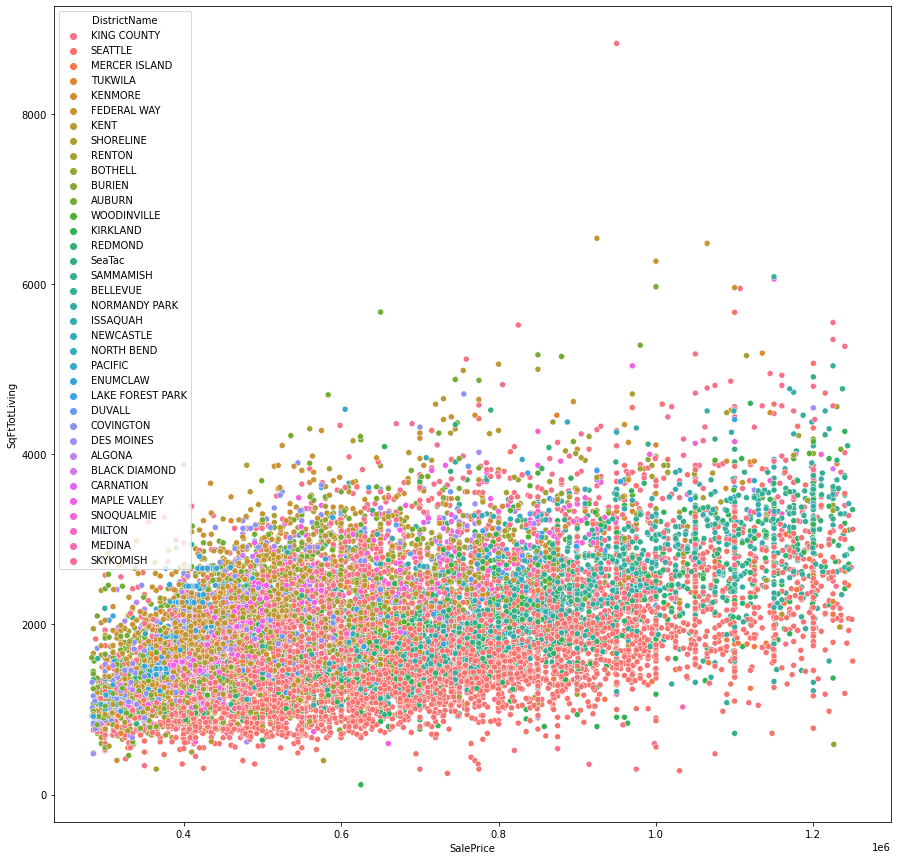

In [62]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df, x="SalePrice", y="SqFtTotLiving", hue='DistrictName')
# plt.ylim(bottom=0, top=10000)

In [230]:
df.SqFtLot.describe()

count     15804.000000
mean      14269.799291
std       36627.900311
min         375.000000
25%        5000.000000
50%        7453.500000
75%       10230.250000
max      897336.000000
Name: SqFtLot, dtype: float64

In [234]:
df.SqFtLot.describe()

count     15804.000000
mean      14269.799291
std       36627.900311
min         375.000000
25%        5000.000000
50%        7453.500000
75%       10230.250000
max      897336.000000
Name: SqFtLot, dtype: float64

In [236]:
df.describe()

Major         Minor     SalePrice       BldgNbr  \
count   15804.000000  15804.000000  1.580400e+04  15804.000000   
mean   463003.677993   1396.452417  6.521675e+05      1.003607   
std    288283.847270   2656.860923  2.286967e+05      0.074959   
min       100.000000      1.000000  2.830010e+05      1.000000   
25%    215400.000000    110.000000  4.600000e+05      1.000000   
50%    398120.000000    310.000000  6.200000e+05      1.000000   
75%    735985.000000    910.000000  8.050000e+05      1.000000   
max    990400.000000   9672.000000  1.249950e+06      7.000000   

       NbrLivingUnits       Stories     BldgGrade  BldgGradeVar  SqFt1stFloor  \
count    15804.000000  15804.000000  15804.000000       15804.0  15804.000000   
mean         1.009365      1.482093      7.501962           0.0   1208.602696   
std          0.109827      0.528318      0.945149           0.0    425.204577   
min          1.000000      1.000000      3.000000           0.0     20.000000   
25%          1.000000      1.000000      7.000000           0.0    930.000000   
50%          1.000000      1.000000      7.000000           0.0   1180.000000   
75%          1.000000      2.000000      8.000000           0.0   1430.000000   
max          3.000000      3.500000     11.000000           0.0   5520.000000   

       SqFtHalfFloor  SqFt2ndFloor  SqFtUpperFloor  SqFtUnfinFull  \
count   15804.000000  15804.000000    15804.000000   15804.000000   
mean       42.489876    437.817957       10.945963       0.637813   
std       155.336477    586.326037       75.349896      23.166105   
min         0.000000      0.000000        0.000000       0.000000   
25%         0.000000      0.000000        0.000000       0.000000   
50%         0.000000      0.000000        0.000000       0.000000   
75%         0.000000    900.000000        0.000000       0.000000   
max      1930.000000   4330.000000     1350.000000    1350.000000   

       SqFtUnfinHalf  SqFtTotLiving  SqFtTotBasement  SqFtFinBasement  \
count   15804.000000   15804.000000     15804.000000     15804.000000   
mean        0.493040    1968.762845       447.275690       270.073905   
std        15.726782     742.742388       541.352956       405.813724   
min         0.000000     116.000000         0.000000         0.000000   
25%         0.000000    1420.000000         0.000000         0.000000   
50%         0.000000    1870.000000         0.000000         0.000000   
75%         0.000000    2420.000000       900.000000       500.000000   
max       920.000000    8830.000000      3100.000000      2590.000000   

       FinBasementGrade  SqFtGarageBasement  SqFtGarageAttached  \
count      15804.000000        15804.000000        15804.000000   
mean           2.737218           84.169767          252.051316   
std            3.465304          177.152575          273.204151   
min            0.000000            0.000000            0.000000   
25%            0.000000            0.000000            0.000000   
50%            0.000000            0.000000          200.000000   
75%            7.000000            0.000000          460.000000   
max           11.000000         1386.000000         2248.000000   

       SqFtOpenPorch  SqFtEnclosedPorch      SqFtDeck    HeatSystem  \
count   15804.000000       15804.000000  15804.000000  15804.000000   
mean       60.323083           5.229246    124.984751      4.953683   
std       101.431431          31.905589    194.221045      1.009607   
min         0.000000           0.000000      0.000000      0.000000   
25%         0.000000           0.000000      0.000000      5.000000   
50%         0.000000           0.000000      0.000000      5.000000   
75%        80.000000           0.000000    200.000000      5.000000   
max      1860.000000         670.000000   2100.000000      8.000000   

         HeatSource    BrickStone      Bedrooms  BathHalfCount  Bath3qtrCount  \
count  15804.000000  15804.000000  15804.000000   15804.000000   15804.000000   
mean

In [237]:
df = df[df['PropertyType'] == 11]

In [238]:
len(df)

15804

In [239]:
len(df[df['DistrictName'] == 'SEATTLE'])

4644

<Figure size 1080x1080 with 0 Axes>

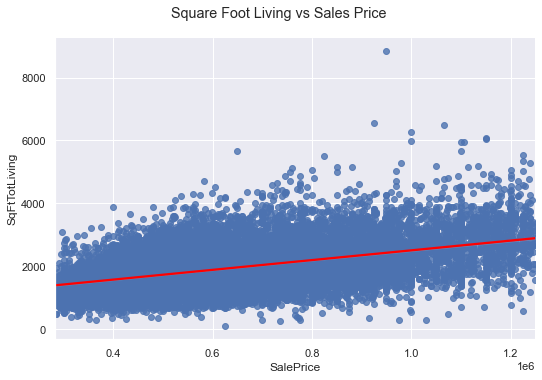

In [91]:
%matplotlib inline
sns.set()
plt.figure(figsize=(15,15))
ax = sns.lmplot(x="SalePrice", y="SqFtTotLiving", data=df, height = 5, aspect=1.5, line_kws={'color': 'red'});
ax.fig.suptitle('Square Foot Living vs Sales Price',y=1.05);

back to culling more columns...

In [92]:
df.columns

Index(['Major', 'Minor', 'SalePrice', 'BldgNbr', 'NbrLivingUnits', 'Address',
       'BuildingNumber', 'StreetName', 'ZipCode', 'Stories', 'BldgGrade',
       'BldgGradeVar', 'SqFt1stFloor', 'SqFtHalfFloor', 'SqFt2ndFloor',
       'SqFtUpperFloor', 'SqFtUnfinFull', 'SqFtUnfinHalf', 'SqFtTotLiving',
       'SqFtTotBasement', 'SqFtFinBasement', 'FinBasementGrade',
       'SqFtGarageBasement', 'SqFtGarageAttached', 'DaylightBasement',
       'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck', 'HeatSystem',
       'HeatSource', 'BrickStone', 'Bedrooms', 'BathHalfCount',
       'Bath3qtrCount', 'BathFullCount', 'FpSingleStory', 'FpMultiStory',
       'FpFreestanding', 'FpAdditional', 'YrBuilt', 'YrRenovated',
       'PcntComplete', 'Condition', 'Township', 'Section', 'QuarterSection',
       'Area', 'SubArea', 'DistrictName', 'HBUAsIfVacant', 'HBUAsImproved',
       'SqFtLot', 'WaterSystem', 'SewerSystem', 'Access', 'RestrictiveSzShape',
       'InadequateParking', 'WfntFootage', 'WfntBank', 

In [99]:
more_cols =  ['PrincipalUse', 'PcntComplete', 'WaterProblems', 'BldgNbr', 'NbrLivingUnits', 'BldgGradeVar',\
             'SqFtUnfinFull', 'SqFtUnfinHalf', 'BrickStone', 'HBUAsIfVacant', 'HBUAsImproved', 'RestrictiveSzShape',\
             'WfntFootage', 'WfntBank' , 'WfntRestrictedAccess', 'WfntAccessRights', 'OtherNuisances', 'NbrBldgSites',\
             'CurrentUseDesignation', 'RecordingNbr', 'PropertyClass', 'PropertyType' ]

In [96]:
for col in df.columns:
    print(col)
    print(df[col].value_counts())

Major
276760    78
814136    61
762570    50
343850    41
510140    41
          ..
195442     1
866915     1
387657     1
713280     1
569400     1
Name: Major, Length: 5907, dtype: int64
Minor
40      297
20      278
30      277
60      263
70      259
       ... 
4726      1
636       1
668       1
2741      1
2049      1
Name: Minor, Length: 2299, dtype: int64
SalePrice
450000    159
650000    156
400000    146
550000    136
700000    128
         ... 
653500      1
331500      1
755906      1
814800      1
409600      1
Name: SalePrice, Length: 2478, dtype: int64
BldgNbr
1    15753
2       49
7        1
3        1
Name: BldgNbr, dtype: int64
NbrLivingUnits
1    15678
2      104
3       22
Name: NbrLivingUnits, dtype: int64
Address
                              10
15425   2ND AVE NE  98155      4
3502   TROLL AVE N             3
3  NE 153RD PL   98007         2
30018   55TH PL S  98001       2
                              ..
4707   26TH AVE SW             1
18054   2ND PL S  98148

Name: TrafficNoise, dtype: int64
OtherNuisances
N    15320
Y      484
Name: OtherNuisances, dtype: int64
NbrBldgSites
0    15740
1       44
2       13
3        5
5        1
4        1
Name: NbrBldgSites, dtype: int64
CurrentUseDesignation
0    15787
3       15
1        2
Name: CurrentUseDesignation, dtype: int64
WaterProblems
N    15770
Y       34
Name: WaterProblems, dtype: int64
DocumentDate
06/25/2019    143
06/26/2019    126
06/18/2019    118
06/24/2019    113
07/09/2019    112
             ... 
11/02/2019      1
05/26/2019      1
11/24/2019      1
05/05/2019      1
02/02/2019      1
Name: DocumentDate, Length: 355, dtype: int64
RecordingNbr
                  1160
20191231001558       2
20191121001135       1
20190809001424       1
20190926001712       1
                  ... 
20191212001644       1
20190604000440       1
20191025001276       1
20191023000954       1
20200103001042       1
Name: RecordingNbr, Length: 14644, dtype: int64
PropertyType
11    15804
Name: PropertyType, 

In [94]:
df.WaterProblems.value_counts()

N    15770
Y       34
Name: WaterProblems, dtype: int64

In [100]:
df.drop(columns=more_cols, inplace=True)

In [101]:
df.head()

Major  Minor  SalePrice                        Address BuildingNumber  \
10  10050    380     445000       2435  S 354TH ST   98003          2435    
11  10050    380     311000       2435  S 354TH ST   98003          2435    
21  18800     95     730000  1602   LAKEVIEW BLVD E  98102          1602    
28  19110    310    1055700      4520   88TH AVE SE  98040          4520    
34  17900   1770     565000      12207   50TH AVE S  98168          12207   

                   StreetName ZipCode  Stories  BldgGrade  SqFt1stFloor  \
10  354TH                       98003      1.0          7          1480   
11  354TH                       98003      1.0          7          1480   
21  LAKEVIEW                    98102      2.0          9           660   
28  88TH                        98040      1.0          8          1390   
34  50TH                        98168      1.0          8          1350   

    SqFtHalfFloor  SqFt2ndFloor  SqFtUpperFloor  SqFtTotLiving  \
10              0             0               0           1480   
11              0             0               0           1480   
21              0           595               0           1540   
28              0             0               0           2780   
34              0             0               0           2230   

    SqFtTotBasement  SqFtFinBasement  FinBasementGrade  SqFtGarageBasement  \
10                0                0                 0                   0   
11                0                0                 0                   0   
21              380              285                 8                   0   
28             1390             1390                 7                   0   
34             1280              880                 7                 400   

    SqFtGarageAttached DaylightBasement  SqFtOpenPorch  SqFtEnclosedPorch  \
10                 440                              80                  0   
11                 440                              80                  0   
21                   0                Y              0                  0   
28                   0                Y              0                  0   
34                  80                Y             40                  0   

    SqFtDeck  HeatSystem  HeatSource  Bedrooms  BathHalfCount  Bath3qtrCount  \
10       120           5           2         3              0              0   
11       120           5           2         3              0              0   
21       155           1           3         3              1              1   
28       100           5           2         6              0              1   
34       100           5           3         3              0              0   

    BathFullCount  FpSingleStory  FpMultiStory  FpFreestanding  FpAdditional  \
10              2              1             0               0             0   
11              2              1             0               0             0   
21              1              0             1               0             0   
28              1              0             1               0             1   
34              2              1             0               0             0   

    YrBuilt  YrRenovated  Condition  Township  Section QuarterSection  Area  \
10     1994            0          5        21       28             NE  55.0   
11     1994            0          5        21       28             NE  55.0   
21     1984            0          3        25       20             SE  13.0   
28     1967            0          3        24       18             SW  34.0   
34     2015            0          3        23       10             SE  24.0   

    SubArea   DistrictName  SqFtLot  WaterSystem  SewerSystem  Access  \
10     15.0    KING COUNTY     6446            2            2       4   
11     15.0    KING COUNTY     6446            2            2       4   
21      3.0        SEATTLE     3117            2            2       4   
28      3.0  MERCER ISLAND     9

In [103]:
df.reset_index(drop=True)

Major  Minor  SalePrice                        Address BuildingNumber  \
0       10050    380     445000       2435  S 354TH ST   98003          2435    
1       10050    380     311000       2435  S 354TH ST   98003          2435    
2       18800     95     730000  1602   LAKEVIEW BLVD E  98102          1602    
3       19110    310    1055700      4520   88TH AVE SE  98040          4520    
4       17900   1770     565000      12207   50TH AVE S  98168          12207   
...       ...    ...        ...                            ...            ...   
15799  873213   1030     425000      3603  SW 328TH PL   98023          3603    
15800  873218     20     391000     32602   47TH AVE SW  98023          32602   
15801  195160    190     309000      25643   29TH AVE S  98032          25643   
15802  195440    120     759990       22131  NE 9TH PL   98074          22131   
15803  197220   5172     849950            11 B W DRAVUS ST             11      

                      StreetName ZipCode  Stories  BldgGrade  SqFt1stFloor  \
0      354TH                       98003      1.0          7          1480   
1      354TH                       98003      1.0          7          1480   
2      LAKEVIEW                    98102      2.0          9           660   
3      88TH                        98040      1.0          8          1390   
4      50TH                        98168      1.0          8          1350   
...                          ...     ...      ...        ...           ...   
15799  328TH                       98023      1.0          8          1480   
15800  47TH                        98023      1.0          8          1290   
15801  29TH                        98032      1.5          7           830   
15802  9TH                         98074      2.0          8          1250   
15803  DRAVUS                        NaN      3.0          8           220   

       SqFtHalfFloor  SqFt2ndFloor  SqFtUpperFloor  SqFtTotLiving  \
0                  0             0               0           1480   
1                  0             0               0           1480   
2                  0           595               0           1540   
3                  0             0               0           2780   
4                  0             0               0           2230   
...              ...           ...             ...            ...   
15799              0             0               0           2510   
15800              0             0               0           1910   
15801            130             0               0            960   
15802              0           760               0           2010   
15803              0           510             380           1600   

       SqFtTotBasement  SqFtFinBasement  FinBasementGrade  SqFtGarageBasement  \
0                    0                0                 0                   0   
1                    0                0                 0                   0   
2                  380              285                 8                   0   
3                 1390             1390                 7                   0   
4                 1280              880                 7                 400   
...                ...              ...               ...                 ...   
15799             1340             1030                 7                 310   
15800              620              620                 8                   0   
15801                0                0                 0                   0   
15802                0                0                 0                   0   
15803              490              490                 8                   0   

       SqFtGarageAttached DaylightBasement  SqFtOpenPorch  SqFtEnclosedPorch  \
0                     440                              80                  0   
1                     440                              80                  0   
2                       0                Y              

In [104]:
df.to_csv('cleaned.csv')

In [105]:
for col in df.columns:
    print(col)
    print(df[col].value_counts())

Major
276760    78
814136    61
762570    50
343850    41
510140    41
          ..
195442     1
866915     1
387657     1
713280     1
569400     1
Name: Major, Length: 5907, dtype: int64
Minor
40      297
20      278
30      277
60      263
70      259
       ... 
4726      1
636       1
668       1
2741      1
2049      1
Name: Minor, Length: 2299, dtype: int64
SalePrice
450000    159
650000    156
400000    146
550000    136
700000    128
         ... 
653500      1
331500      1
755906      1
814800      1
409600      1
Name: SalePrice, Length: 2478, dtype: int64
Address
                              10
15425   2ND AVE NE  98155      4
3502   TROLL AVE N             3
3  NE 153RD PL   98007         2
30018   55TH PL S  98001       2
                              ..
4707   26TH AVE SW             1
18054   2ND PL S  98148        1
3835  SW 313TH ST   98023      1
1612   177TH AVE NE  98008     1
4729  S 295TH PL   98001       1
Name: Address, Length: 15682, dtype: int64
BuildingNum

0    8732
1    6955
2     114
3       3
Name: BathHalfCount, dtype: int64
Bath3qtrCount
0    9204
1    5702
2     860
3      35
4       2
5       1
Name: Bath3qtrCount, dtype: int64
BathFullCount
1    8266
2    6482
3     813
0     179
4      58
5       5
6       1
Name: BathFullCount, dtype: int64
FpSingleStory
1    8164
0    6984
2     618
3      35
4       3
Name: FpSingleStory, dtype: int64
FpMultiStory
0    11519
1     4145
2      137
4        2
3        1
Name: FpMultiStory, dtype: int64
FpFreestanding
0    14751
1     1017
2       36
Name: FpFreestanding, dtype: int64
FpAdditional
0    13250
1     2515
2       39
Name: FpAdditional, dtype: int64
YrBuilt
2018    470
1977    301
1968    299
1967    295
1978    286
2004    279
2005    263
2019    261
2007    259
1987    258
2006    246
2003    244
1979    236
1990    228
1959    226
1962    226
1989    221
1955    209
1988    209
1969    209
2008    207
2015    198
1954    194
1986    194
1966    192
1961    192
1960    187
1980   

In [106]:
more_cols =  ['LotDepthFactor', 'WaterSystem', 'SewerSystem', 'Section']
df.drop(columns=more_cols, inplace=True)

In [107]:
df.shape

(15804, 47)

In [108]:
import geopandas

ModuleNotFoundError: No module named 'geopandas'

In [109]:
import geopy